# Project 2 - Ames Housing Data

## 1. Problem Statement

Our real estate consulting firm in Ames, Iowa specialises in helping clients to conduct house inspections before closing a sale transaction and provide valuable insights and feedback to our clients on the true value of the properties that they are interested in. We aim to develop a good linear regression model based on various external and internal features of a property to estimate its true value. The model will be built using past sales transaction data and we will evaluate our model using RMSE and R2 evaluation metrics. This valuable information will provide useful insights to our clients in helping them to make a decision on which property to purchase. 


## 2. Executive Summary

In this project, we will be looking at the Ames housing data set (train.csv) and analyse the various features and their relationship to the sale prices of each property. We are going to first clean up the data and do an analysis on the distribution of each features, and based on these statistics, we will shortlist 49 features for our model. 

We started off with building a model that only includes the key features from Size to get a gauge of the model performance. This starts off as the base of our model. We then built a second test model with all the 49 selected features, and as expected, we obtained a very poor R2 score and clearly, the model is overfitting. We then applied Ridge regression and Lasso regression on the second test models to see how the features actually affect the sale prices. Lasso was very useful in this case since we have an overwhelming number of features, it helped to eliminate some of the features that are not as significant. From there, we modified and reselected some of the other features based on prior experience and eventually arrived at Test Model 7 that we used to predict sale prices for our test data. We have decided to use Ridge regression for our final selected model as we do not want to elminate any more features but intead to decrease the variance of our model so as to minimise any overfitting. Test Model 7 gave a relatively good RMSE value as well as higher consistency in its R2 scores before train and test data.

### Contents:
- [3. Data Import & Cleaning](#3.-Data-Import-and-Cleaning)
- [3.1 Cleaning up ames data set](#3.1-Cleaning-up-ames-data-set)
- [3.2 Cleaning up test data set](#3.2-Cleaning-up-test-data-set)
- [4. Exploratory Data Analysis](#4.-Exploratory-Data-Analysis)
- [4.1 Size](#4.1-Size)
- [4.2 Land](#4.2-Land)
- [4.3 Ordinal Features](#4.3-Ordinal-Features)
- [4.4 Nominal Features](#4.4-Nominal-Features)
- [4.5 Numerical Features](#4.4-Numerical-Features)
- [5. Linear Regression Model & Evaluation](#5.-Linear-Regression-Model-&-Evaluation)
- [6. Prediction using test data set](#6.-Prediction-using-test-data-set)
- [7. Key Observations and Conclusions](#7.-Key-Observations-and-Conclusions)

### Data Dictionary

|Feature|Variable type|Datatype|Description|
|:------|:-------|:-------|:-----|
|Id|Discrete|int|Observation number|
|PID|Nominal|int|Parcel identification number|
|MS_Subclass|Nominal|int|Identifies the type of dwelling involved in the sale|
|MS_Zoning|Nominal|object|Identifies the general zoning classification of the sale|
|Lot Frontage|Continuous|float|Linear feet of street connected to property, with mean of 69 ft|
|Lot Area|Continuous|int|Lot size in square feet, with mean value of 9,850 sqft|
|Street|Nominal|object|Type of road access to property|
|Alley|Nominal|object|Type of alley access to property|
|Lot Shape|Ordinal|object|General shape of property|
|Land Contour|Nominal|object|Flatness of the property|
|Utilities|Ordinal|object|Type of utilities available|
|Lot Config|Nominal|object|Lot configuration|
|Land Slope|Ordinal|object|Slope of property|
|Neighborhood|Nominal|object|Physical locations within Ames city limits|
|Condition 1|Nominal|object|Proximity to various conditions|
|Condition 2|Nominal|object|Proximity to various conditions (if more than one is present)|
|Bldg Type|Nominal|object|Type of dwelling|
|House Style|Nominal|object|Style of dwelling|
|Overall Qual|Ordinal|int|Rates the overall material and finish of the house|
|Overall Cond|Ordinal|int|Rates the overall condition of the house|
|Year Built|Discrete|int|Original construction date, range from 1872 to 2010|
|Year Remod/Add|Discrete|int|Remodel date if applicable or construction date, range from 1950 to 2010|
|Roof Style|Nominal|object|Type of roof|
|Roof Matl|Nominal|object|Roof material|
|Exterior 1st|Nominal|object|Exterior covering on house|
|Exterior 2nd|Nominal|object|Exterior covering on house (if more than one material)|
|Mas Vnr Type|Nominal|object|Masonry veneer type|
|Mas Vnr Area|Continuous|float|Masonry veneer area in square feet|
|Exter Qual|Ordinal|object|Evaluates the quality of the material on the exterior|
|Exter Cond|Ordinal|object|Evaluates the present condition of the material on the exterior|
|Foundation|Nominal|object|Type of foundation|
|Bsmt Qual|Ordinal|object|Evaluates the height of the basement|
|Bsmt Cond|Ordinal|object|Evaluates the general condition of the basement|
|Bsmt Exposure|Ordinal|object|Refers to walkout or garden level walls|
|Bsmtfin Type_1|Ordinal|object|Rating of basement finished area|
|Bsmtfin SF 1|Continuous|float|Type 1 finished square feet|
|Bsmtfin Type 2|Ordinal|object|Rating of basement finished area (if multiple types)|
|Bsmtfin SF 2|Continuous|float|Type 1 finished square feet|
|Bsmt Unf SF|Continuous|float|Unfinished square feet of basement area|
|Total Bsmt SF|Continuous|float|Total square feet of basement area, with mean of 1051|
|Heating|Nominal|object|Type of heating|
|Heating QC|Ordinal|object|Heating quality and condition|
|Central Air|Nominal|object|Central air conditioning
|Electrical|Ordinal|object|Electrical system|
|1st Flr SF|Continuous|int|First Floor square feet|
|2nd Flr SF|Continuous|int|Second floor square feet|
|Low Qual Fin SF|Continuous|int|Low quality finished square feet (all floors)|
|Gr Liv Area|Continuous|int|Above grade (ground) living area square feet
|Bsmt Full Bath|Discrete|float|Basement full bathrooms|
|Bsmt Half Bath|Discrete|float|Basement half bathrooms|
|Full Bath|Discrete|int|Full bathrooms above grade|
|Half Bath|Discrete|int|Half baths above grade|
|Bedroom Abvgr|Discrete|int|Bedrooms above grade (does NOT include basement bedrooms)|
|Kitchen Abvgr|Discrete|int|Kitchens above grade|
|Kitchen Qual|Ordinal|object|Kitchen quality|
|Totrms Abvgrd|Discrete|int|Total rooms above grade (does not include bathrooms)|
|Functional|Ordinal|object|Home functionality (Assume typical unless deductions are warranted)|
|Fireplaces|Discrete|int|Number of fireplaces|
|Fireplace QU|Ordinal|object|Fireplace quality|
|Garage Type|Nominal|object|Garage location|
|Garage Yr Blt|Discrete|float|Year garage was built|
|Garage Finish|Ordinal|object|Interior finish of the garage|
|Garage Cars|Discrete|float|Size of garage in car capacity|
|Garage Area|Continuous|float|Size of garage in square feet|
|Garage Qual|Ordinal|object|Garage quality|
|Garage Cond|Ordinal|object|Garage condition|
|Paved Drive|Ordinal|object|Paved driveway|
|Wood Deck SF|Continuous|int|Wood deck area in square feet|
|Open Porch SF|Continuous|int|Open porch area in square feet|
|Enclosed Porch|Continuous|int|Enclosed porch area in square feet|
|3ssn Porch|Continuous|int|Three season porch area in square feet|
|Screen Porch|Continuous|int|Screen porch area in square feet|
|Pool Area|Continuous|int|Pool area in square feet|
|Pool QC|Ordinal|object|Pool quality|
|Fence|Ordinal|object|Fence quality|
|Misc Feature|Nominal|object|Miscellaneous feature not covered in other categories|
|Misc Val|Continuous|int|Value of miscellaneous feature|
|Mo Sold|Discrete|int|Month Sold (MM)|
|Yr Sold|Discrete|int|Year Sold (YYYY),fron 2006 to 2010|
|Sale Type|Nominal|object|Type of sale|
|SalePrice|Continuous|int|Sale price of each property with mean price of 180,762 and median \$161,000|

## 3. Data Import and Cleaning

In [1]:
#Imports needed for Project 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
#Read in training data set as ames and test data set as test
ames = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

### 3.1 Cleaning up ames data set

In [3]:
ames.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [4]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

#### 3.1.1 Description of train (ames) data set

The train data list contains information for 2051 properties, each with 81 descriptive features including the sale price of each property. The descriptive features come in both numerical values as well as classes as object data type. The data set seems to contain many null values across various categories/festures that we need to deal with later.

In [5]:
#Checking the number of classes in each category with datatype as 'object' to see if there is any missing class 
ames.select_dtypes(include=['object']).nunique()

MS Zoning          7
Street             2
Alley              2
Lot Shape          4
Land Contour       4
Utilities          3
Lot Config         5
Land Slope         3
Neighborhood      28
Condition 1        9
Condition 2        8
Bldg Type          5
House Style        8
Roof Style         6
Roof Matl          6
Exterior 1st      15
Exterior 2nd      15
Mas Vnr Type       4
Exter Qual         4
Exter Cond         5
Foundation         6
Bsmt Qual          5
Bsmt Cond          5
Bsmt Exposure      4
BsmtFin Type 1     6
BsmtFin Type 2     6
Heating            5
Heating QC         5
Central Air        2
Electrical         5
Kitchen Qual       4
Functional         8
Fireplace Qu       5
Garage Type        6
Garage Finish      3
Garage Qual        5
Garage Cond        5
Paved Drive        3
Pool QC            4
Fence              4
Misc Feature       5
Sale Type          9
dtype: int64

In [6]:
#Looking at the count of each class in the different categories, and missing classes are recorded in table below.
#This information will be used later when we deal with null values.
ames.groupby('Sale Type')['Id'].count()

Sale Type
COD        63
CWD        10
Con         4
ConLD      17
ConLI       7
ConLw       5
New       160
Oth         4
WD       1781
Name: Id, dtype: int64

Cateogories with incomplete classes:

|Columns|Actual No. of classes|Listed No. of Classes|Missing class(es) description|
|---|---|---|---|
|MS Zoning|8|7|RP: Residential Low Density Park|
|Alley|3|2|NA: No alley access|
|Utilities|4|3|ELO: Electricity only|
|Condition 2|9|8|RRNe: Within 200' of East-West Railroad|
|Roof Matl|8|6|ClyTile: Clay or Tile / Roll: Roll|
|Exterior 1st|17|15|Other: Other / PreCast: PreCast|
|Exterior 2nd|17|15|Other: Other / PreCast: PreCast|
|Mas Vnr Type|5|4|CBlock: Cinder Block|
|Exter Qual|5|4|Po: Poor|
|Bsmt Qual|6|5|NA: No Basement|
|Bsmt Cond|6|5|NA: No Basement|
|Bsmt Exposure|5|4|NA: No Basement|
|BsmtFin Type 1|7|6|NA: No Basement|
|BsmtFin Type 2|7|6|NA: No Basement|
|Heating|6|5|Floor: Floor Furnace|
|Kitchen Qual|5|4|Po: Poor|
|Fireplace Qu|6|5|NA: No Fireplace|
|Garage Type|7|6|NA: No Garage|
|Garage Finish|4|3|NA: No Garage|
|Garage Qual|6|5|NA: No Garage|
|Garage Cond|6|5|NA: No Garage|
|Pool QC|5|4|NA: No Pool|
|Fence|5|4|NA: No Fence|
|Misc Feature|6|5|NA: None|
|Sale Type|10|9|VWD: Warranty Deed - VA Loan|

In [7]:
# look for any duplicated row entries
dup = ames.duplicated()
dup.any()

False

#### 3.1.2 Dropping unwanted data rows

Text(0.5, 1.0, 'Plot of Sale Price VS Gr Living Area')

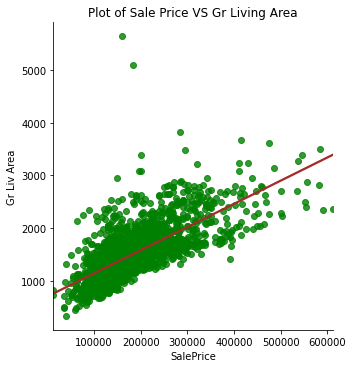

In [8]:
# Looking for unusual sales transactions with a plot of SALE PRICE versus GR LIV AREA
sns.lmplot(x='SalePrice',y='Gr Liv Area',data=ames,ci=False,scatter_kws={"color": "green"}, line_kws={"color": "brown"})
plt.title('Plot of Sale Price VS Gr Living Area')

In [9]:
# Removing outliers with extremely large gr living area but low sale prices
ames[ames['Gr Liv Area']>4000]

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
960   1499  908154235           60        RL         313.0     63887   Pave   
1885  2181  908154195           20        RL         128.0     39290   Pave   

     Alley Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
960    NaN       IR3          Bnk  ...            0       480      Gd   NaN   
1885   NaN       IR1          Bnk  ...            0         0     NaN   NaN   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
960           NaN        0       1    2008        New     160000  
1885         Elev    17000      10    2007        New     183850  

[2 rows x 81 columns]

In [10]:
ames.drop([960, 1885],inplace=True)

Text(0.5, 1.0, 'Plot of Sale Price VS Lot Area')

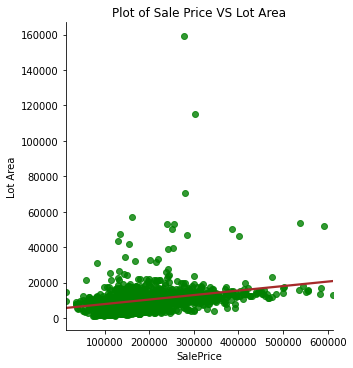

In [11]:
# Looking for unusual sales transactions with a plot of SALE PRICE versus LOT AREA
sns.lmplot(x='SalePrice',y='Lot Area',data=ames,ci=False,scatter_kws={"color": "green"}, line_kws={"color": "brown"})
plt.title('Plot of Sale Price VS Lot Area')

In [12]:
# Removing outliers with extremely large lot area but low sale prices
ames[ames['Lot Area']>60000]

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
471   2116  906426060           50        RL           NaN    159000   Pave   
694   2072  905301050           20        RL           NaN    115149   Pave   
1854  2767  906475200           20        RL          62.0     70761   Pave   

     Alley Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
471    NaN       IR2          Low  ...            0         0     NaN   NaN   
694    NaN       IR2          Low  ...            0         0     NaN   NaN   
1854   NaN       IR1          Low  ...            0         0     NaN   NaN   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
471          Shed      500       6    2007        WD      277000  
694           NaN        0       6    2007        WD      302000  
1854          NaN        0      12    2006        WD      280000  

[3 rows x 81 columns]

In [13]:
# Dropping 3 data rows with Lot area > 60000 
ames.drop([471, 694, 1854],inplace=True)

In [14]:
ames.shape

(2046, 81)

Text(0.5, 1.0, 'Plot of Sale Price VS Lot Frontage')

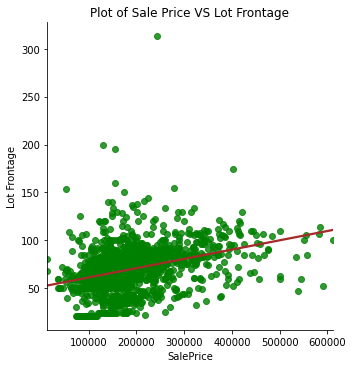

In [15]:
# Looking for unusual sales transactions with a plot of SALE PRICE versus LOT Frontage
sns.lmplot(x='SalePrice',y='Lot Frontage',data=ames,ci=False,scatter_kws={"color": "green"}, line_kws={"color": "brown"})
plt.title('Plot of Sale Price VS Lot Frontage')

In [16]:
# Removing outliers with large lot frontage but low sale prices
ames[ames['Lot Frontage']>250]

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
1335  1266  535427070           20        RL         313.0     27650   Pave   

     Alley Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
1335   NaN       IR2          HLS  ...            0         0     NaN   NaN   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
1335          NaN        0      11    2008        WD      242000  

[1 rows x 81 columns]

In [17]:
# Dropping data row with Lot Frontage > 250
ames.drop(1335,inplace=True)

In [18]:
ames.shape

(2045, 81)

#### 3.1.3 Looking at null values

In [19]:
# Looking at which categories contain null values
pd.options.display.max_rows = 81
ames.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        328
Lot Area              0
Street                0
Alley              1905
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [20]:
# Dropping 2 columns with more than 1900 (93%) missing values, keeping Pool QC as this feature is linked to Pool Area.
ames.drop(['Alley','Misc Feature'], axis=1, inplace=True)

In [21]:
ames.shape

(2045, 79)

In [22]:
# Define a function to fill missing values

def fill_missing(df, col_list, value):
    df[col_list] = df[col_list].fillna(value)
    return df

#### Pool Area 

|Feature| No. of null values|
|---|---|
|Pool Area |            0|
|Pool QC |           2038|

In [23]:
ames.groupby('Pool Area')['Id'].count()

Pool Area
0      2037
228       1
368       1
519       1
561       1
576       1
648       1
738       1
800       1
Name: Id, dtype: int64

OBSERVATION:

Number of null values for pool area coincides with houses with pool area which is zero, hence we can fill the null values of Pool QC to be NA.

In [24]:
# Filling missing values for Pool QC as 'NA'
fill_missing(ames, ['Pool QC'], 'NA')

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      109  533352170           60        RL           NaN     13517   Pave   
1      544  531379050           60        RL          43.0     11492   Pave   
2      153  535304180           20        RL          68.0      7922   Pave   
3      318  916386060           60        RL          73.0      9802   Pave   
4      255  906425045           50        RL          82.0     14235   Pave   
...    ...        ...          ...       ...           ...       ...    ...   
2046  1587  921126030           20        RL          79.0     11449   Pave   
2047   785  905377130           30        RL           NaN     12342   Pave   
2048   916  909253010           50        RL          57.0      7558   Pave   
2049   639  535179160           20        RL          80.0     10400   Pave   
2050    10  527162130           60        RL          60.0      7500   Pave   

     Lot Shape Land Contour Utilities  ... 3Ssn Porch Screen Porch Pool Area  \
0          IR1          Lvl    AllPub  ...          0            0         0   
1          IR1          Lvl    AllPub  ...          0            0         0   
2          Reg          Lvl    AllPub  ...          0            0         0   
3          Reg          Lvl    AllPub  ...          0            0         0   
4          IR1          Lvl    AllPub  ...          0            0         0   
...        ...          ...       ...  ...        ...          ...       ...   
2046       IR1          HLS    AllPub  ...          0            0         0   
2047       IR1          Lvl    AllPub  ...          0            0         0   
2048       Reg          Bnk    AllPub  ...          0            0         0   
2049       Reg          Lvl    AllPub  ...          0            0         0   
2050       Reg          Lvl    AllPub  ...          0            0         0   

     Pool QC Fence Misc Val Mo Sold  Yr Sold  Sale Type  SalePrice  
0         NA   NaN        0       3     2010        WD      130500  
1         NA   NaN        0       4     2009        WD      220000  
2         NA   NaN        0       1     2010        WD      109000  
3         NA   NaN        0       4     2010        WD      174000  
4         NA   NaN        0       3     2010        WD      138500  
...      ...   ...      ...     ...      ...        ...        ...  
2046      NA   NaN        0       1     2008        WD      298751  
2047      NA   NaN        0       3     2009        WD       82500  
2048      NA   NaN        0       3     2009        WD      177000  
2049      NA   NaN        0      11     2009        WD      144000  
2050      NA   NaN        0       6     2010        WD      189000  

[2045 rows x 79 columns]

In [25]:
ames['Pool QC'].isnull().sum()

0

#### Garage 

There are seven features that are related to garage. We will look at these data as a group and infer meaningful values to be filled in for the null entries.

|Feature| No. of null values|
|---|---|
|Garage Type|113|
|Garage Yr Blt|       114|
|Garage Finish|       114|
|Garage Cars|           1|
|Garage Area|           1|
|Garage Qual|        114|
|Garage Cond|        114|

In [26]:
ames.groupby('Garage Area')['Id'].count()

Garage Area
0.0       113
100.0       1
160.0       2
162.0       1
164.0       1
         ... 
1220.0      1
1231.0      1
1314.0      1
1348.0      1
1356.0      1
Name: Id, Length: 511, dtype: int64

OBSERVATIONS:

Since there are 113 properties with garage area which is zero, 113 out of 114 null values from Garage Yr Blt, Garage Finish, Garage Qual and Garage Cond comes about because there is no garage, 'NA' is missing data from these features. We can fill the null values of Garage Finish, Garage Qual and Garage Cond to be 'NA', and tentatively set null values of Garage Yr Blt to be 0. However, we have to locate the property that has a garage but missing values for various fields.

In [27]:
# Identifying the property that has a garage but with missing values 
ames.loc[(ames['Garage Area'].isnull()),['Garage Area','Garage Type','Garage Yr Blt','Garage Cars','Garage Finish','Garage Qual','Garage Cond','SalePrice']]

Garage Area Garage Type  Garage Yr Blt  Garage Cars Garage Finish  \
1712          NaN      Detchd            NaN          NaN           NaN   

     Garage Qual Garage Cond  SalePrice  
1712         NaN         NaN     150909

In [28]:
# Filter out properties with Garage Type of 'Detchd'
detached_garage = ames.loc[((ames['Garage Type']=='Detchd')&(pd.notnull(ames['Garage Area']))),:]

Text(0.5, 1.0, 'Plot of Garage Area VS SalePrice')

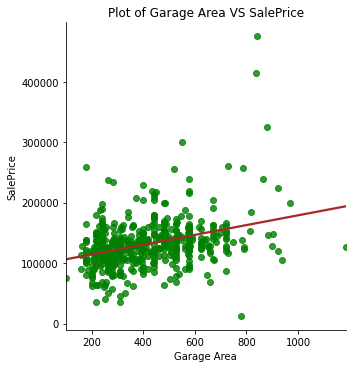

In [29]:
sns.lmplot(x='Garage Area',y='SalePrice',data=detached_garage,ci=False,scatter_kws={"color": "green"}, line_kws={"color": "brown"})
plt.title('Plot of Garage Area VS SalePrice')

In [30]:
X = detached_garage[['SalePrice']]
y = detached_garage['Garage Area']

lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [31]:
beta_0 = lr.intercept_
beta_1 = lr.coef_
(beta_0, beta_1)

(229.54655601809932, array([0.00143831]))

In [32]:
# Fill the missing value of Garage Area of index 1712 using a linear regression estimate
area = beta_0 + beta_1*150909
ames.at[1712, 'Garage Area'] = area
area

array([446.60014534])

Text(0.5, 1.0, 'Plot of Garage Cars VS Garage Area')

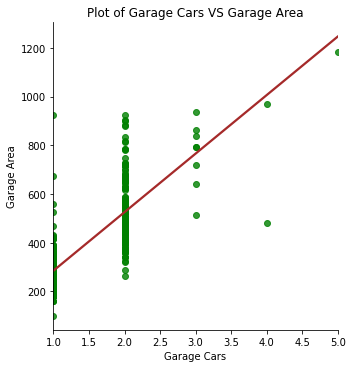

In [33]:
sns.lmplot(x='Garage Cars',y='Garage Area',data=detached_garage,ci=False,scatter_kws={"color": "green"}, line_kws={"color": "brown"})
plt.title('Plot of Garage Cars VS Garage Area')

In [34]:
ames.groupby('Garage Cars')['Garage Area'].mean()

Garage Cars
0.0       0.000000
1.0     295.146947
2.0     519.450044
3.0     804.080153
4.0     941.384615
5.0    1184.000000
Name: Garage Area, dtype: float64

In [35]:
#With an estimated Garage Area of 446, the estimated Garage Cars is 2.0.
ames.at[1712, 'Garage Cars'] = 2.0

Text(0.5, 1.0, 'Plot of Year Built VS Garage Yr Blt')

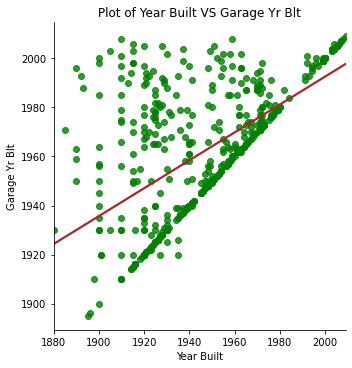

In [36]:
# Looking at the relationship between the year the property was built and year garage was built.
sns.lmplot(x='Year Built',y='Garage Yr Blt',data=detached_garage,ci=False,scatter_kws={"color": "green"}, line_kws={"color": "brown"})
plt.title('Plot of Year Built VS Garage Yr Blt')

In [37]:
# Checking year that the property was built
ames.loc[1712,['Year Built']]

Year Built    1923
Name: 1712, dtype: object

OBSERVATION:

The year in which the garage was built must be in the same year the property was built or later. Many of the garage built was in the same year that property was built. With limited information, we will assume that year garage was built for 1712 to be the same year that property was built.

In [38]:
# Assigning garage year built to be same as year property was built
ames.at[1712, 'Garage Yr Blt'] = 1923

In [39]:
# Using mode as one of the central measures to give a 'value' to the respective feature of 1712.
ames[['Garage Finish','Garage Qual','Garage Cond']].mode()

Garage Finish Garage Qual Garage Cond
0           Unf          TA          TA

In [40]:
ames.at[1712, 'Garage Finish'] = 'Unf'
ames.at[1712, 'Garage Qual'] = 'TA'
ames.at[1712, 'Garage Cond'] = 'TA'

In [41]:
# Checking the changed variables for 1index 1712.
ames.loc[1712,['Garage Area','Garage Type','Garage Yr Blt','Garage Cars','Garage Finish','Garage Qual','Garage Cond','SalePrice']]

Garage Area       446.6
Garage Type      Detchd
Garage Yr Blt      1923
Garage Cars           2
Garage Finish       Unf
Garage Qual          TA
Garage Cond          TA
SalePrice        150909
Name: 1712, dtype: object

In [42]:
# Filling the null values of Garage Finish, Garage Qual and Garage Cond to be 'NA'
# Set null values of Garage Yr Blt to be 0.

cols = ['Garage Type', 'Garage Finish','Garage Qual','Garage Cond']
fill_missing(ames, cols, 'NA')
fill_missing(ames, ['Garage Yr Blt'], 0)

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      109  533352170           60        RL           NaN     13517   Pave   
1      544  531379050           60        RL          43.0     11492   Pave   
2      153  535304180           20        RL          68.0      7922   Pave   
3      318  916386060           60        RL          73.0      9802   Pave   
4      255  906425045           50        RL          82.0     14235   Pave   
...    ...        ...          ...       ...           ...       ...    ...   
2046  1587  921126030           20        RL          79.0     11449   Pave   
2047   785  905377130           30        RL           NaN     12342   Pave   
2048   916  909253010           50        RL          57.0      7558   Pave   
2049   639  535179160           20        RL          80.0     10400   Pave   
2050    10  527162130           60        RL          60.0      7500   Pave   

     Lot Shape Land Contour Utilities  ... 3Ssn Porch Screen Porch Pool Area  \
0          IR1          Lvl    AllPub  ...          0            0         0   
1          IR1          Lvl    AllPub  ...          0            0         0   
2          Reg          Lvl    AllPub  ...          0            0         0   
3          Reg          Lvl    AllPub  ...          0            0         0   
4          IR1          Lvl    AllPub  ...          0            0         0   
...        ...          ...       ...  ...        ...          ...       ...   
2046       IR1          HLS    AllPub  ...          0            0         0   
2047       IR1          Lvl    AllPub  ...          0            0         0   
2048       Reg          Bnk    AllPub  ...          0            0         0   
2049       Reg          Lvl    AllPub  ...          0            0         0   
2050       Reg          Lvl    AllPub  ...          0            0         0   

     Pool QC Fence Misc Val Mo Sold  Yr Sold  Sale Type  SalePrice  
0         NA   NaN        0       3     2010        WD      130500  
1         NA   NaN        0       4     2009        WD      220000  
2         NA   NaN        0       1     2010        WD      109000  
3         NA   NaN        0       4     2010        WD      174000  
4         NA   NaN        0       3     2010        WD      138500  
...      ...   ...      ...     ...      ...        ...        ...  
2046      NA   NaN        0       1     2008        WD      298751  
2047      NA   NaN        0       3     2009        WD       82500  
2048      NA   NaN        0       3     2009        WD      177000  
2049      NA   NaN        0      11     2009        WD      144000  
2050      NA   NaN        0       6     2010        WD      189000  

[2045 rows x 79 columns]

In [43]:
ames['Garage Yr Blt'].isnull().sum()

0

#### Basement

There are nine features that are related to basement.

|Feature| No. of null values|
|---|---|
|Bsmt Qual     |       55|
|Bsmt Cond      |      55|
|Bsmt Exposure   |     58|
|BsmtFin Type 1   |    55|
|BsmtFin SF 1   |       1|
|BsmtFin Type 2  |     56|
|BsmtFin SF 2  |        1|
|Bsmt Unf SF   |        1|
|Total Bsmt SF  |       1|

In [44]:
ames.groupby('Total Bsmt SF')['Id'].count()

Total Bsmt SF
0.0       54
160.0      1
173.0      1
190.0      1
192.0      1
          ..
2660.0     1
2846.0     1
3094.0     1
3200.0     1
3206.0     1
Name: Id, Length: 888, dtype: int64

OBSERVATION:

There are 54 properties with no basement. 'NA' is a missing class for Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1 and BsmtFin Type 2. We can fill in NA as missing value for the above features for the 54 properties with no basement.

In [45]:
# Identifying the property with missing basement SF info
bsmt_col = ['Total Bsmt SF','Bsmt Unf SF','BsmtFin SF 2','BsmtFin SF 1','BsmtFin Type 2','BsmtFin Type 1','Bsmt Exposure','Bsmt Cond','Bsmt Qual']
ames.loc[(ames['Total Bsmt SF'].isnull()),bsmt_col]

Total Bsmt SF  Bsmt Unf SF  BsmtFin SF 2  BsmtFin SF 1 BsmtFin Type 2  \
1327            NaN          NaN           NaN           NaN            NaN   

     BsmtFin Type 1 Bsmt Exposure Bsmt Cond Bsmt Qual  
1327            NaN           NaN       NaN       NaN

In [46]:
# Dropping the data row with index 1327 as all information for basement is missing
ames.drop([1327],inplace=True)

In [47]:
ames.shape

(2044, 79)

In [48]:
# Identifying the 3 properties with basement but no bsmt exposure information.
ames.loc[((ames['Bsmt Exposure'].isnull())&(pd.notnull(ames['Bsmt Qual']))),bsmt_col]


Total Bsmt SF  Bsmt Unf SF  BsmtFin SF 2  BsmtFin SF 1 BsmtFin Type 2  \
1456          725.0        725.0           0.0           0.0            Unf   
1547         1595.0       1595.0           0.0           0.0            Unf   
1997          936.0        936.0           0.0           0.0            Unf   

     BsmtFin Type 1 Bsmt Exposure Bsmt Cond Bsmt Qual  
1456            Unf           NaN        TA        Gd  
1547            Unf           NaN        TA        Gd  
1997            Unf           NaN        TA        Gd

In [49]:
ames[['Bsmt Exposure']].mode()

Bsmt Exposure
0            No

In [50]:
# The mode is 'NO' indicating No Exposure for basement and this is used to fill the 3 null values.
ames.at[[1456, 1547, 1997], 'Bsmt Exposure'] = 'NO'

In [51]:
# Identifying the property with no BsmtFin Type 2 data input.
ames.loc[((ames['BsmtFin Type 2'].isnull())&(pd.notnull(ames['Bsmt Qual']))),bsmt_col]

Total Bsmt SF  Bsmt Unf SF  BsmtFin SF 2  BsmtFin SF 1 BsmtFin Type 2  \
1147         3206.0       1603.0         479.0        1124.0            NaN   

     BsmtFin Type 1 Bsmt Exposure Bsmt Cond Bsmt Qual  
1147            GLQ            No        TA        Gd

In [52]:
ames['BsmtFin Type 2'].value_counts()

Unf    1743
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin Type 2, dtype: int64

In [53]:
# Since this property has a BsmtFin SF 2 value, we cannot input 'Unf'.
# 'Rec' will be used to fill in the missing value indicating it as Average Rec Room
ames.at[1147, 'BsmtFin Type 2'] = 'Rec'

In [54]:
# Filling the null values of Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1 and BsmtFin Type 2 to be 'NA'

cols = ['Bsmt Qual', 'Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2']
fill_missing(ames, cols, 'NA')

ames.isnull().sum().sum()

3018

In [55]:
# Identifying the property with missing bsmt half bath and bsmt full bath value
ames.loc[((ames['Bsmt Half Bath'].isnull())|(ames['Bsmt Full Bath'].isnull())),bsmt_col]

Total Bsmt SF  Bsmt Unf SF  BsmtFin SF 2  BsmtFin SF 1 BsmtFin Type 2  \
616            0.0          0.0           0.0           0.0             NA   

    BsmtFin Type 1 Bsmt Exposure Bsmt Cond Bsmt Qual  
616             NA            NA        NA        NA

In [56]:
ames['Bsmt Half Bath'].value_counts()

0.0    1919
1.0     120
2.0       4
Name: Bsmt Half Bath, dtype: int64

In [57]:
# Since property index 616 has no basement, we fill in '0' for bsmt half bath and bsmt full bath
fill_missing(ames, ['Bsmt Half Bath','Bsmt Full Bath'], 0)

ames.isnull().sum().sum()

3016

In [58]:
ames['Bsmt Half Bath'].value_counts()

0.0    1920
1.0     120
2.0       4
Name: Bsmt Half Bath, dtype: int64

#### Masonry Veneer

In [59]:
ames.shape

(2044, 79)

In [60]:
# There are 22 missing values for masonry veneer, as we dont have meaningful data to fill these, we will drop them.
ames = ames[ames['Mas Vnr Type'].notnull()]

In [61]:
ames.shape

(2022, 79)

#### Lot Frontage

There are 322 missing values for Lot Frontage. We will look at the relationship between Lot Frontage and Lot Area to find a correlation and obtain good estimates for the null values.

In [62]:
# Extracting data rows without missing Lot Frontage values
lot = ames.loc[ames['Lot Frontage'].notnull(),['Lot Frontage','Lot Area']]
lot.head()

Lot Frontage  Lot Area
1          43.0     11492
2          68.0      7922
3          73.0      9802
4          82.0     14235
5         137.0     16492

Text(0.5, 1.0, 'Plot of Lot Area VS Lot Frontage')

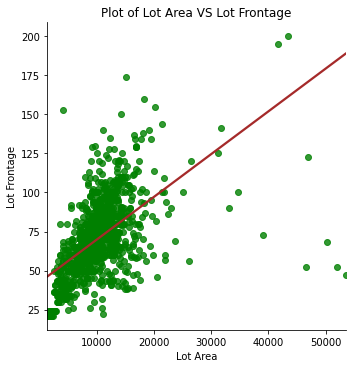

In [63]:
sns.lmplot(x='Lot Area', y='Lot Frontage', data=lot, ci=False,scatter_kws={"color": "green"}, line_kws={"color": "brown"})
plt.title('Plot of Lot Area VS Lot Frontage')

In [64]:
# Instantiating and fitting a linear regression model for Lot Area to estimate Lot Frontage
X = lot[['Lot Area']]
y = lot['Lot Frontage']

lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [65]:
# Finding the intercept and coef of the linear regression model
beta_0 = lr.intercept_
beta_1 = lr.coef_
(beta_0, beta_1)

(42.6262146421751, array([0.002734]))

In [66]:
ames['Lot Frontage'].head()
# row 0 containing a NaN 

0     NaN
1    43.0
2    68.0
3    73.0
4    82.0
Name: Lot Frontage, dtype: float64

In [67]:
# Assigning new values to lot frontage based on regression model
ames['Lot Frontage'] = np.where(ames['Lot Frontage'].isnull(), beta_0 + beta_1*ames['Lot Area'], ames['Lot Frontage'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [68]:
ames['Lot Frontage'].head()
# row 0 NaN is replaced by value obtained from regression

0    79.581668
1    43.000000
2    68.000000
3    73.000000
4    82.000000
Name: Lot Frontage, dtype: float64

#### Fireplace Quality and Fence

There are 991 missing values for fireplace quality and 1624 missing values for fence. In both features, the class 'NA' is missing. As we do not have sufficient information to determine their quality, we will assume 'NA' for both features.

In [69]:
# Checking number of fireplaces for all the properties listed.
ames['Fireplaces'].value_counts()

0    991
1    885
2    140
3      5
4      1
Name: Fireplaces, dtype: int64

In [70]:
# Filling in 'NA' for missing values in Fireplace Qu and Fence
fill_missing(ames, ['Fireplace Qu','Fence'], 'NA')

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3062: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      109  533352170           60        RL     79.581668     13517   Pave   
1      544  531379050           60        RL     43.000000     11492   Pave   
2      153  535304180           20        RL     68.000000      7922   Pave   
3      318  916386060           60        RL     73.000000      9802   Pave   
4      255  906425045           50        RL     82.000000     14235   Pave   
...    ...        ...          ...       ...           ...       ...    ...   
2046  1587  921126030           20        RL     79.000000     11449   Pave   
2047   785  905377130           30        RL     76.369220     12342   Pave   
2048   916  909253010           50        RL     57.000000      7558   Pave   
2049   639  535179160           20        RL     80.000000     10400   Pave   
2050    10  527162130           60        RL     60.000000      7500   Pave   

     Lot Shape Land Contour Utilities  ... 3Ssn Porch Screen Porch Pool Area  \
0          IR1          Lvl    AllPub  ...          0            0         0   
1          IR1          Lvl    AllPub  ...          0            0         0   
2          Reg          Lvl    AllPub  ...          0            0         0   
3          Reg          Lvl    AllPub  ...          0            0         0   
4          IR1          Lvl    AllPub  ...          0            0         0   
...        ...          ...       ...  ...        ...          ...       ...   
2046       IR1          HLS    AllPub  ...          0            0         0   
2047       IR1          Lvl    AllPub  ...          0            0         0   
2048       Reg          Bnk    AllPub  ...          0            0         0   
2049       Reg          Lvl    AllPub  ...          0            0         0   
2050       Reg          Lvl    AllPub  ...          0            0         0   

     Pool QC Fence Misc Val Mo Sold  Yr Sold  Sale Type  SalePrice  
0         NA    NA        0       3     2010        WD      130500  
1         NA    NA        0       4     2009        WD      220000  
2         NA    NA        0       1     2010        WD      109000  
3         NA    NA        0       4     2010        WD      174000  
4         NA    NA        0       3     2010        WD      138500  
...      ...   ...      ...     ...      ...        ...        ...  
2046      NA    NA        0       1     2008        WD      298751  
2047      NA    NA        0       3     2009        WD       82500  
2048      NA    NA        0       3     2009        WD      177000  
2049      NA    NA        0      11     2009        WD      144000  
2050      NA    NA        0       6     2010        WD      189000  

[2022 rows x 79 columns]

In [71]:
pd.options.display.max_rows = 81
ames.isnull().sum().sum()
# All missing values have been filled with appropriate numbers

0

OBSERVATION

In [72]:
ames.shape

(2022, 79)

In [73]:
# Checking percentage of rows being dropped.
(2051-2022)/2051*100

1.4139444173573867

In total, 28 rows and 2 columns were dropped. We have removed about 1.4% of the original data from the train data set.

### 3.2 Cleaning up test data set

In [74]:
test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area Pool QC  \
0  Grvl       Reg          Lvl  ...          0            0         0     NaN   
1   NaN       IR1          Lvl  ...          0            0         0     NaN   
2   NaN       IR1          Lvl  ...          0            0         0     NaN   
3   NaN       Reg          Lvl  ...          0            0         0     NaN   
4   NaN       IR1          Lvl  ...          0          185         0     NaN   

  Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
0   NaN          NaN        0       4     2006        WD   
1   NaN          NaN        0       8     2006        WD   
2   NaN          NaN        0       9     2006        New  
3   NaN          NaN        0       7     2007        WD   
4   NaN          NaN        0       7     2009        WD   

[5 rows x 80 columns]

In [75]:
test.shape

(879, 80)

In [76]:
# Checking which features have null values.
test.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       160
Lot Area             0
Street               0
Alley              821
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type         1
Mas Vnr Area         1
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           25
Bsmt Cond           25
Bsmt Exposure       25
BsmtFin Type 1      25
BsmtFin SF 1         0
BsmtFin Type 2      25
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
Heating              0
Heating QC           0
Central Air          0
Electrical 

OBSERVATION:

For the test data set, there are 879 data rows and 80 features related to the properties. The column 'SalePrice' is missing as this is what we need to estimate using our linear regression model. We will clean the test data in a way similar to the train data by first dropping 2 unwanted columns with too many incomplete data and then fill in the missing null values for the other columns.

In [77]:
# Dropping the 2 columns 'Alley' and 'Misc Feature'
test.drop(['Alley','Misc Feature'],axis=1, inplace=True)

In [78]:
test.shape

(879, 78)

In [79]:
# Checking the number of properties with no fireplace
test['Fireplaces'].value_counts()

0    422
1    376
2     75
3      6
Name: Fireplaces, dtype: int64

In [80]:
# Checking the number of properties with no fireplace
test['Pool Area'].value_counts()

0      875
555      1
512      1
444      1
144      1
Name: Pool Area, dtype: int64

In [81]:
# Filling the missing values of Fireplace Qu, Pool QC and Fence with NA
fill_missing(test, ['Fireplace Qu','Pool QC','Fence'], 'NA')

test.isnull().sum().sum()

512

In [82]:
# Filling in missing value using linear regression from Lot Area in train data
test['Lot Frontage'] = np.where(test['Lot Frontage'].isnull(), beta_0 + beta_1*test['Lot Area'], test['Lot Frontage'])

In [83]:
# Finding number of properties with no basement
test['Total Bsmt SF'].value_counts()

0       25
864     23
768     10
672      9
780      9
        ..
1657     1
635      1
636      1
1664     1
1553     1
Name: Total Bsmt SF, Length: 527, dtype: int64

In [84]:
# Fill in 'NA' for missing data related to basement
cols = ['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2']
fill_missing(test, cols, 'NA')

test.isnull().sum().sum()

227

In [85]:
# Finding number of properties with no garage
test['Garage Area'].value_counts()

0       44
576     28
440     26
484     24
240     24
        ..
456      1
455      1
454      1
453      1
1014     1
Name: Garage Area, Length: 357, dtype: int64

In [86]:
# Identifying the property with a garage but no garage type indicated
garage = ['Garage Type','Garage Yr Blt','Garage Finish','Garage Cars','Garage Area','Garage Qual','Garage Cond']
test[(pd.notna(test['Garage Type']))&(test['Garage Yr Blt'].isnull())][garage]


Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area  \
765      Detchd            NaN           NaN            1          360   

    Garage Qual Garage Cond  
765         NaN         NaN

In [87]:
# Checking year that the property was built
test.loc[765,['Year Built']]

Year Built    1910
Name: 765, dtype: object

In [88]:
# Assigning garage year built to be same as year property was built
test.at[765, 'Garage Yr Blt'] = 1910

In [89]:
# Using mode as one of the central measures to give a 'value' to the respective feature of 765.
test[['Garage Finish','Garage Qual','Garage Cond']].mode()

Garage Finish Garage Qual Garage Cond
0           Unf          TA          TA

In [90]:
test.at[765, 'Garage Finish'] = 'Unf'
test.at[765, 'Garage Qual'] = 'TA'
test.at[765, 'Garage Cond'] = 'TA'

In [91]:
# Checking the changed variables for 1index 765.
test.loc[765, garage]

Garage Type      Detchd
Garage Yr Blt      1910
Garage Finish       Unf
Garage Cars           1
Garage Area         360
Garage Qual          TA
Garage Cond          TA
Name: 765, dtype: object

In [92]:
# Filling the null values of Garage Finish, Garage Qual and Garage Cond to be 'NA'
# Set null values of Garage Yr Blt to be 0.

cols = ['Garage Type', 'Garage Finish','Garage Qual','Garage Cond']
fill_missing(test, cols, 'NA')
fill_missing(test, ['Garage Yr Blt'], 0)

test.isnull().sum().sum()

3

In [93]:
test[test['Mas Vnr Type'].isnull()][['Mas Vnr Type','Mas Vnr Area']]

Mas Vnr Type  Mas Vnr Area
866          NaN           NaN

In [94]:
# Assuming no Masonry veneer for property index 866
fill_missing(test, ['Mas Vnr Type'], 'None')
fill_missing(test, ['Mas Vnr Area'], 0)

test.isnull().sum().sum()

1

In [95]:
# Using mode as one of the central measures to give a 'value' to the missing Electrical data.
test['Electrical'].mode()

0    SBrkr
dtype: object

In [96]:
fill_missing(test, ['Electrical'], 'SBrkr')
test.isnull().sum().sum()
# All missing values of test data has been filled by appropriate data.

0

## 4. Exploratory Data Analysis

For data exploratory, we will break down the columns into different group and look at them one by one as there are too many features. Traditionally, size and land features have significant impact on sale prices. We will look at features from these two groups separately. As there are many features that are categorial in nature, we will look at the ordinal and nominal features next, followed by the rest of numerical data.

In [97]:
# Define a function to plot the frequency distribution of a feature and showing its mean value on the same graph.

def plot_hist(df, feature):
    mean = df[feature].mean()
    plt.figure(figsize=(12,8))
    
    # mean will be displaced as a dotted red line
    plt.axvline(x=mean,c='r',ls='--')
    plt.text(mean,0,'Mean',c='r',size=15)
    
    # plot of frequency distribution using seaborn
    sns.distplot(df[feature]);
    plt.title('Frequency Distribution of {}'.format(feature), {'fontsize': 20})

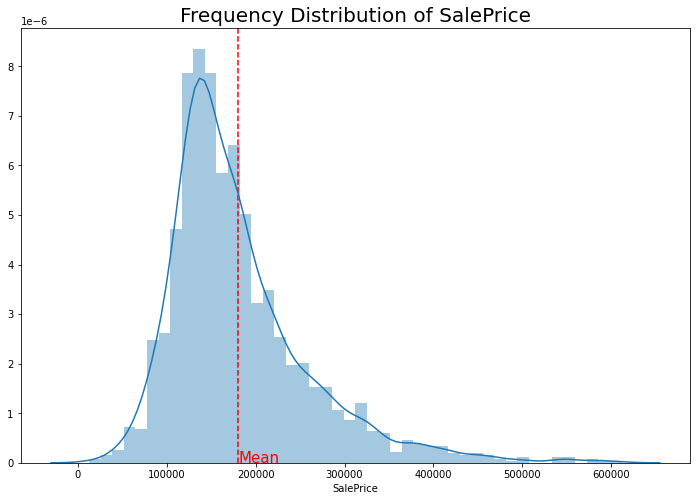

In [98]:
plot_hist(ames, 'SalePrice')

In [99]:
#(round(ames['SalePrice'].mean(),2),ames['SalePrice'].median(),ames['Sale'])
ames['SalePrice'].describe()

count      2022.000000
mean     180762.604847
std       79109.004181
min       12789.000000
25%      129500.000000
50%      161000.000000
75%      213000.000000
max      611657.000000
Name: SalePrice, dtype: float64

OBSERVATION:

The frequency distribution of the sale prices is slightly skewed right with mean of 180,762.60. It has a standard deviation of 79,109 and median of 161,000. From the frequency distribution, we can see that majority of the sale price of properties are within the IQR. There are also a small percentage of properties with very high values, thus pulling the mean prices to be higher than the median.

In [100]:
# Finding the correlation coefficients that are >0.5 to see which features are collinear. 
# Other values are stored as NaN.
corr_df = ames.corr()[(abs(ames.corr())>0.5)&(ames.corr()!=1)]

In [101]:
# Creating a dictionary to store the feature pairs and their correlation coefficients.
column_names = corr_df.columns
row_names = corr_df.index
corr_dict = {}

for col in column_names:
    for row in row_names:
        value = corr_df.loc[row,col]
        if (pd.notna(value)) & (round(value,3) not in corr_dict.values()):
            corr_dict[(row,col)] = round(corr_df.loc[row,col], 3)

In [102]:
corr_dict

{('Yr Sold', 'Id'): -0.976,
 ('Lot Area', 'Lot Frontage'): 0.646,
 ('Year Built', 'Overall Qual'): 0.6,
 ('Year Remod/Add', 'Overall Qual'): 0.581,
 ('Total Bsmt SF', 'Overall Qual'): 0.553,
 ('Gr Liv Area', 'Overall Qual'): 0.566,
 ('Full Bath', 'Overall Qual'): 0.515,
 ('Garage Cars', 'Overall Qual'): 0.586,
 ('Garage Area', 'Overall Qual'): 0.559,
 ('SalePrice', 'Overall Qual'): 0.803,
 ('Year Remod/Add', 'Year Built'): 0.625,
 ('Garage Cars', 'Year Built'): 0.542,
 ('SalePrice', 'Year Built'): 0.573,
 ('SalePrice', 'Year Remod/Add'): 0.55,
 ('SalePrice', 'Mas Vnr Area'): 0.52,
 ('Bsmt Unf SF', 'BsmtFin SF 1'): -0.5,
 ('Bsmt Full Bath', 'BsmtFin SF 1'): 0.656,
 ('1st Flr SF', 'Total Bsmt SF'): 0.791,
 ('SalePrice', 'Total Bsmt SF'): 0.666,
 ('Gr Liv Area', '1st Flr SF'): 0.531,
 ('SalePrice', '1st Flr SF'): 0.65,
 ('Gr Liv Area', '2nd Flr SF'): 0.659,
 ('Half Bath', '2nd Flr SF'): 0.618,
 ('Bedroom AbvGr', '2nd Flr SF'): 0.503,
 ('TotRms AbvGrd', '2nd Flr SF'): 0.582,
 ('Full Bath',

The table below shows features with correlation value >0.5. This table gives us an initial insight to which numerical features are significant to predicting sale prices, as well as features that are multi-collinear. 

|Features|Correlation coefficient|
|---|---|
|'SalePrice' & 'Overall Qual'| 0.803|
|'SalePrice' & 'Year Built'| 0.573|
|'SalePrice' & 'Year Remod/Add'| 0.55|
|'SalePrice' & 'Mas Vnr Area'| 0.52|
|'SalePrice' & 'Total Bsmt SF'| 0.666|
|'SalePrice' & '1st Flr SF'| 0.65|
|'SalePrice' & 'Gr Liv Area'| 0.72|
|'SalePrice' & 'Full Bath'| 0.538|
|'SalePrice' & 'TotRms AbvGrd'| 0.513|
|'SalePrice' & 'Garage Cars'| 0.648|
|'SalePrice' & 'Garage Area'| 0.654|
|'Year Built' & 'Overall Qual'| 0.6|
|'Year Remod/Add' & 'Overall Qual'| 0.581|
|'Total Bsmt SF' & 'Overall Qual'| 0.553|
|'Gr Liv Area' & 'Overall Qual'| 0.566|
|'Full Bath' & 'Overall Qual'| 0.515|
|'Garage Cars' & 'Overall Qual'| 0.586|
|'Garage Area' & 'Overall Qual'| 0.559|
|'SalePrice' & 'Overall Qual'| 0.803|
|'Year Remod/Add' & 'Year Built'| 0.625|
|'Garage Cars' & 'Year Built'| 0.542|
|'Bsmt Unf SF' & 'BsmtFin SF 1'| -0.5|
|'Bsmt Full Bath' & 'BsmtFin SF 1'| 0.656|
|'1st Flr SF' & 'Total Bsmt SF'| 0.791|
|'Gr Liv Area' & '1st Flr SF'| 0.531|
|'Gr Liv Area' & '2nd Flr SF'| 0.659|
|'Half Bath' & '2nd Flr SF'| 0.618|
|'Bedroom AbvGr' & '2nd Flr SF'| 0.503|
|'TotRms AbvGrd' & '2nd Flr SF'| 0.582|
|'Full Bath' & 'Gr Liv Area'| 0.631|
|'Bedroom AbvGr' & 'Gr Liv Area'| 0.526|
|'TotRms AbvGrd' & 'Gr Liv Area'| 0.813|
|TotRms AbvGrd' & 'Full Bath'| 0.524|
|'TotRms AbvGrd' & 'Bedroom AbvGr'| 0.663|
|'Garage Area' & 'Garage Yr Blt'| 0.557|
|'Garage Area' & 'Garage Cars'| 0.897|

### Size

In [103]:
# Defining the features that comes with size
size = ['Gr Liv Area','Lot Frontage','Lot Area','Mas Vnr Area','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','1st Flr SF','2nd Flr SF','Garage Area','SalePrice']

In [104]:
ames[size].head()

Gr Liv Area  Lot Frontage  Lot Area  Mas Vnr Area  BsmtFin SF 1  \
0         1479     79.581668     13517         289.0         533.0   
1         2122     43.000000     11492         132.0         637.0   
2         1057     68.000000      7922           0.0         731.0   
3         1444     73.000000      9802           0.0           0.0   
4         1445     82.000000     14235           0.0           0.0   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  1st Flr SF  2nd Flr SF  \
0           0.0        192.0          725.0         725         754   
1           0.0        276.0          913.0         913        1209   
2           0.0        326.0         1057.0        1057           0   
3           0.0        384.0          384.0         744         700   
4           0.0        676.0          676.0         831         614   

   Garage Area  SalePrice  
0        475.0     130500  
1        559.0     220000  
2        246.0     109000  
3        400.0     174000  
4        484.0     138500

In [105]:
# Looking at some statistics for the size features.
ames[size].describe().transpose()

count           mean           std      min        25%  \
Gr Liv Area    2022.0    1493.289812    486.597681    334.0    1126.00   
Lot Frontage   2022.0      69.558104     21.353648     21.0      60.00   
Lot Area       2022.0    9850.734421   5043.948924   1300.0    7500.00   
Mas Vnr Area   2022.0      98.635015    172.444334      0.0       0.00   
BsmtFin SF 1   2022.0     436.899604    439.070999      0.0       0.00   
BsmtFin SF 2   2022.0      48.476261    165.954231      0.0       0.00   
Bsmt Unf SF    2022.0     565.939169    444.685896      0.0     220.00   
Total Bsmt SF  2022.0    1051.315035    425.884268      0.0     792.25   
1st Flr SF     2022.0    1158.851137    377.583649    334.0     879.00   
2nd Flr SF     2022.0     328.846686    425.392526      0.0       0.00   
Garage Area    2022.0     472.060139    214.763514      0.0     316.25   
SalePrice      2022.0  180762.604847  79109.004181  12789.0  129500.00   

                    50%        75%       max  
Gr Liv Area      1441.5    1728.00    3820.0  
Lot Frontage       69.0      80.00     200.0  
Lot Area         9395.5   11475.00   57200.0  
Mas Vnr Area        0.0     160.00    1600.0  
BsmtFin SF 1      368.0     732.00    2188.0  
BsmtFin SF 2        0.0       0.00    1474.0  
Bsmt Unf SF       474.0     809.75    2336.0  
Total Bsmt SF     992.0    1312.75    3206.0  
1st Flr SF       1092.0    1394.25    3820.0  
2nd Flr SF          0.0     689.00    1862.0  
Garage Area       480.0     576.00    1356.0  
SalePrice      161000.0  213000.00  611657.0

<AxesSubplot:>

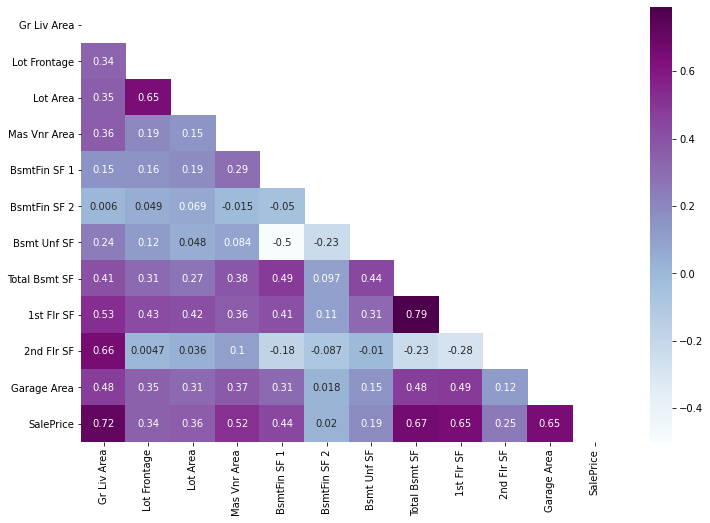

In [106]:
# Displaying the correlation relationship between the size features and sale prices using heatmap.

plt.figure(figsize=(12,8))
mask = np.zeros_like(ames[size].corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(ames[size].corr(),mask=mask,annot=True,cmap="BuPu")

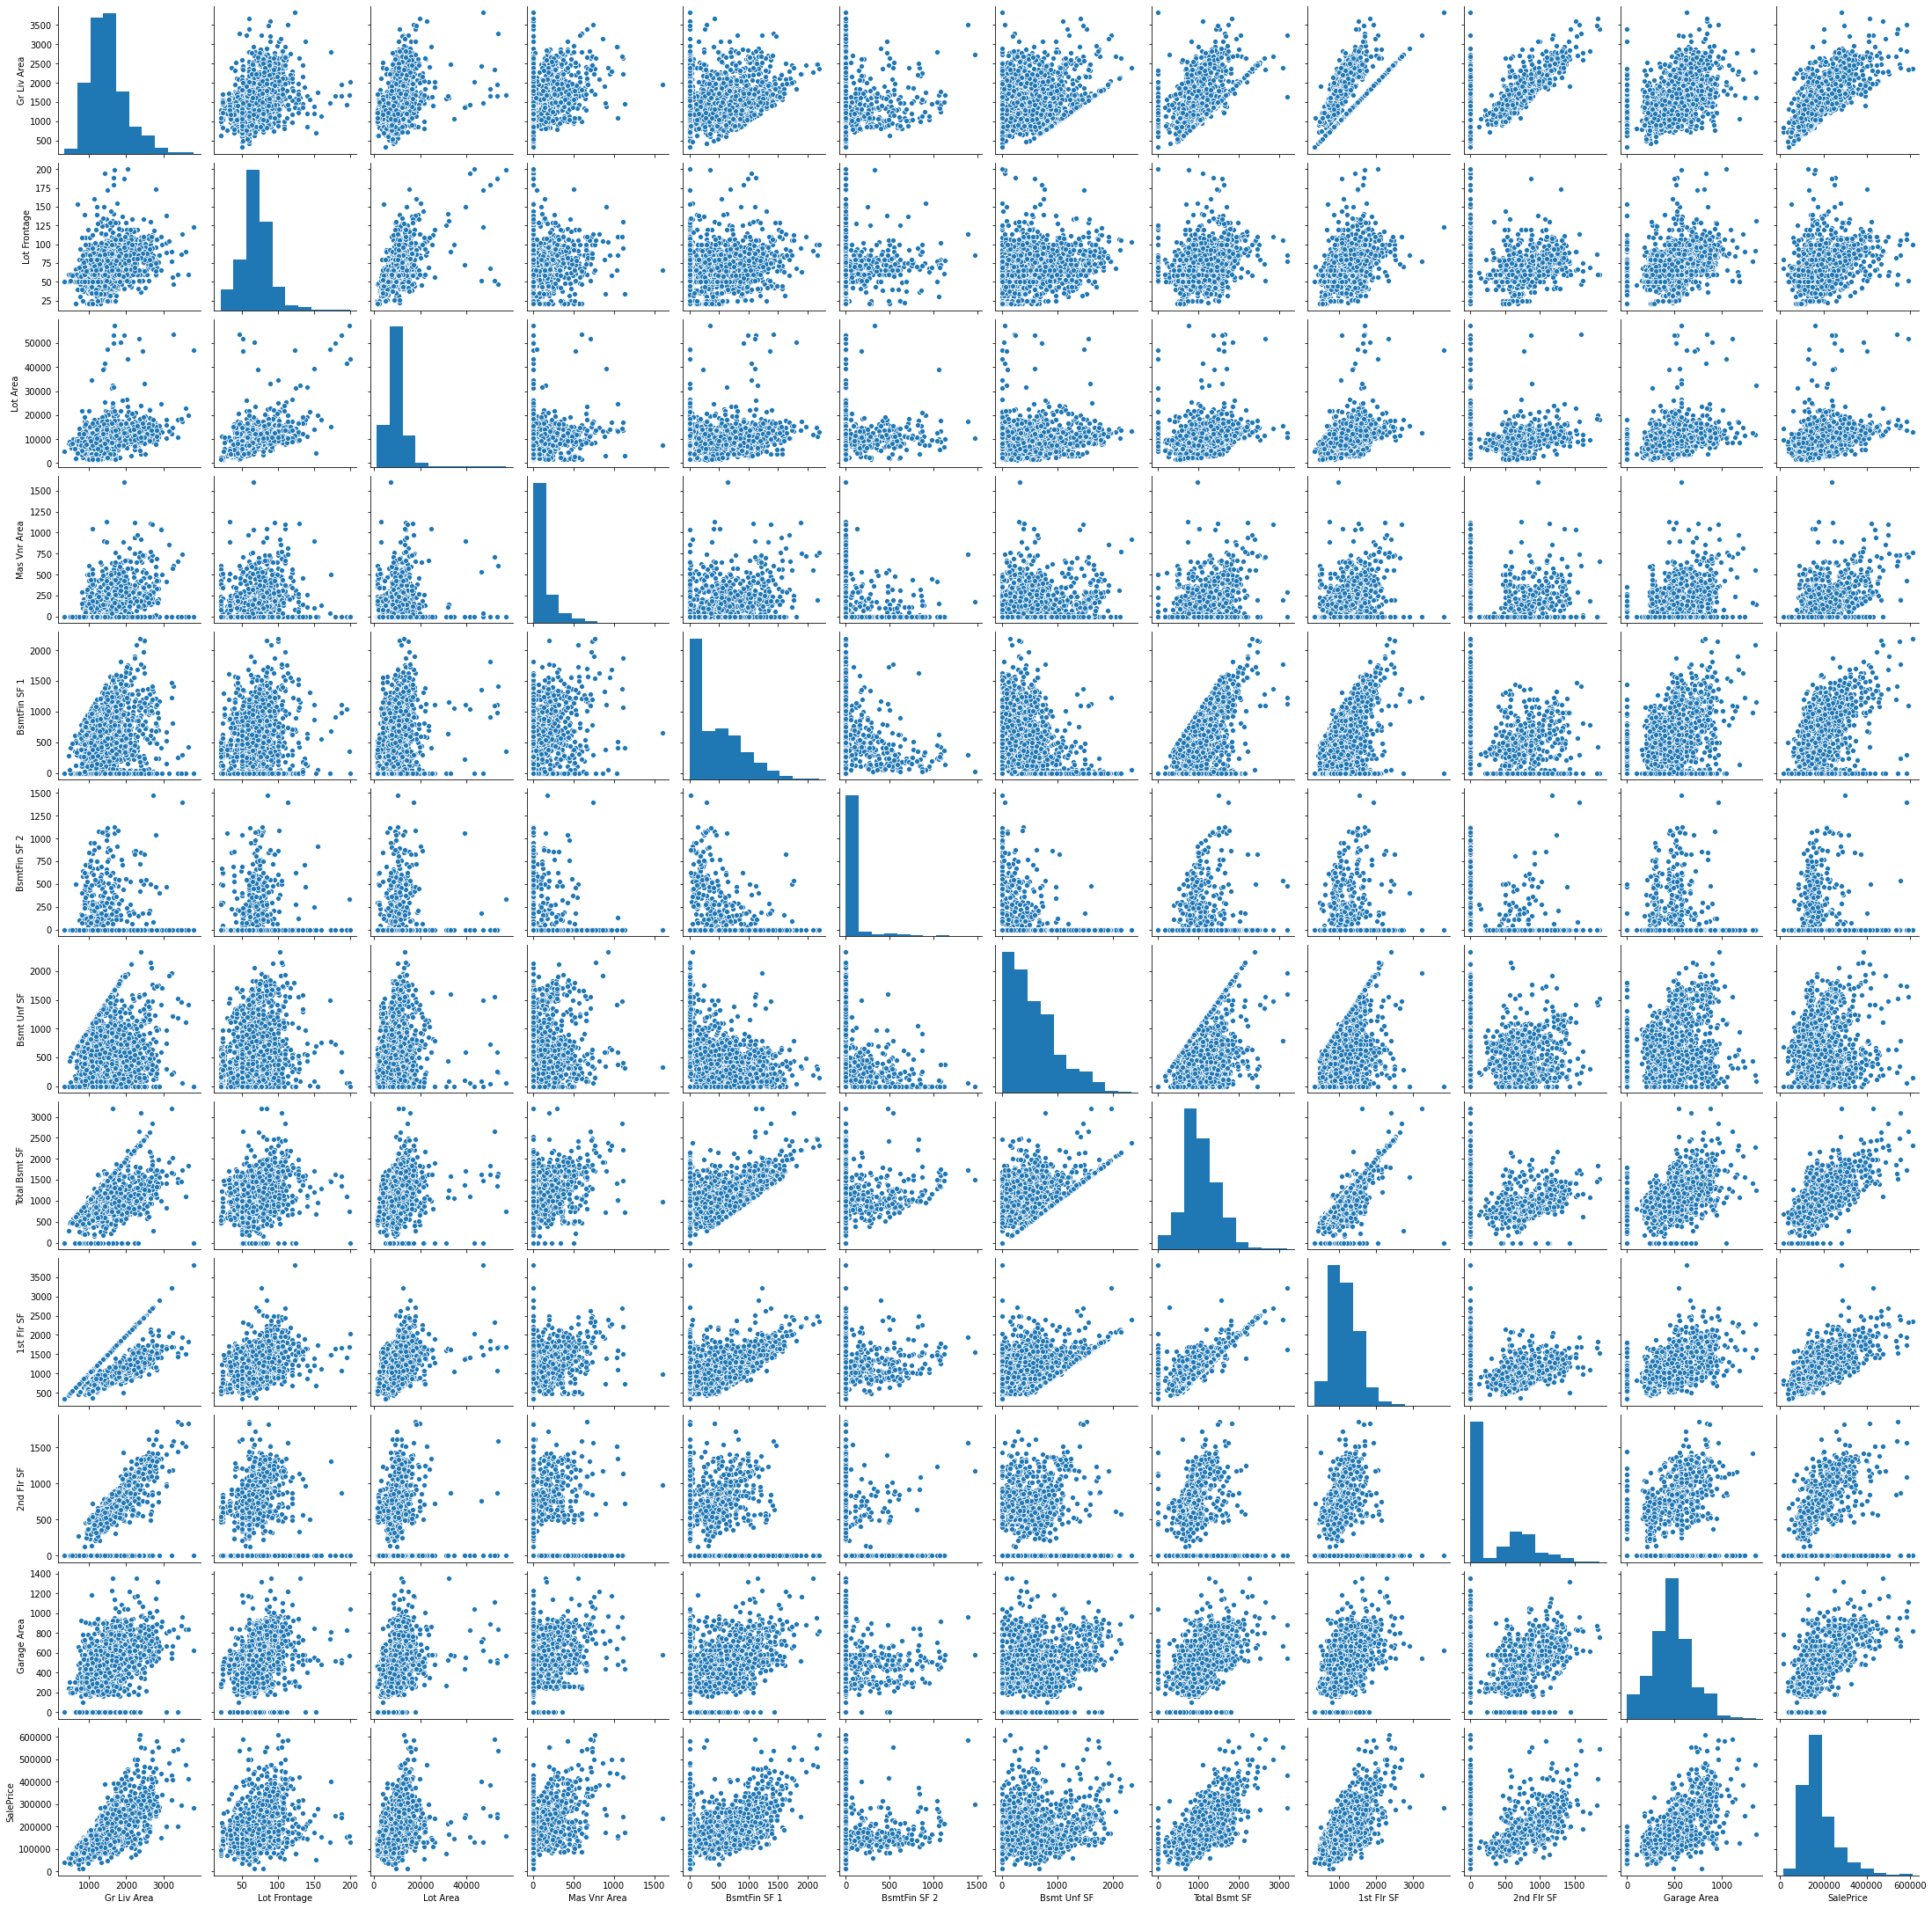

In [107]:
# Analysing the feature pairs with the scatterplot at a glance.
sns.pairplot(ames[size])

OBSERVATION

Gr Liv Area, Mas Vnr Area, Total Bsmt SF, 1st Flr SF and Garage Area have a positive correlation greater than 0.5. However, Total Bsmt SF and 1st Flr SF are also highly correlated with a value of 0.79, we will exclude 1st Flr SF in our model. 

We will build our linear regression model using these features: Gr Liv Area, Mas Vnr Area, Total Bsmt SF and Garage Area.

### 4.2 Land

MS SubClass, MS Zoning, Street, Land Contour, Lot Config, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style

The 10 features above are all nominal data and we will use one-hot encoding to transform them to numerical data.

In [108]:
land = ['MS SubClass', 
        'MS Zoning', 
        'Street', 
        'Land Contour', 
        'Lot Config', 
        'Neighborhood', 
        'Condition 1', 
        'Condition 2', 
        'Bldg Type', 
        'House Style']

In [109]:
# Use one-hot encoding for all the land features and assign the df to ames_new.
ames_new = pd.get_dummies(ames, columns=land)

In [110]:
ames_new.head()

Id        PID  Lot Frontage  Lot Area Lot Shape Utilities Land Slope  \
0  109  533352170     79.581668     13517       IR1    AllPub        Gtl   
1  544  531379050     43.000000     11492       IR1    AllPub        Gtl   
2  153  535304180     68.000000      7922       Reg    AllPub        Gtl   
3  318  916386060     73.000000      9802       Reg    AllPub        Gtl   
4  255  906425045     82.000000     14235       IR1    AllPub        Gtl   

   Overall Qual  Overall Cond  Year Built  ...  Bldg Type_Twnhs  \
0             6             8        1976  ...                0   
1             7             5        1996  ...                0   
2             5             7        1953  ...                0   
3             5             5        2006  ...                0   
4             6             8        1900  ...                0   

  Bldg Type_TwnhsE House Style_1.5Fin House Style_1.5Unf House Style_1Story  \
0                0                  0                  0                  0   
1                0                  0                  0                  0   
2                0                  0                  0                  1   
3                0                  0                  0                  0   
4                0                  1                  0                  0   

  House Style_2.5Fin  House Style_2.5Unf House Style_2Story  \
0                  0                   0                  1   
1                  0                   0                  1   
2                  0                   0                  0   
3                  0                   0                  1   
4                  0                   0                  0   

  House Style_SFoyer House Style_SLvl  
0                  0                0  
1                  0                0  
2                  0                0  
3                  0                0  
4                  0                0  

[5 rows x 161 columns]

In [111]:
# Check column names of features from one-hot encoding, we can refer to this list to select features later on.
land_dict = {}

for feature in land:
    land_dict[feature] = [col for col in ames_new.columns if feature in col]

In [112]:
# Displaying the new features created from 'MS SubClass'
land_dict[land[0]]

['MS SubClass_20',
 'MS SubClass_30',
 'MS SubClass_40',
 'MS SubClass_45',
 'MS SubClass_50',
 'MS SubClass_60',
 'MS SubClass_70',
 'MS SubClass_75',
 'MS SubClass_80',
 'MS SubClass_85',
 'MS SubClass_90',
 'MS SubClass_120',
 'MS SubClass_150',
 'MS SubClass_160',
 'MS SubClass_180',
 'MS SubClass_190']

In [113]:
# Define a function to create multiple boxplot for selected features

def subplot_boxplot(df, col_list):
    nrows = int(np.ceil(len(col_list)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,nrows*6), sharey=True)
    ax = ax.ravel()
    plt.subplots_adjust(hspace=0.4)
    for i, column in enumerate(col_list):
         sns.boxplot(x=column, y='SalePrice', data=df, ax=ax[i])
         ax[i].axhline(y=ames['SalePrice'].mean(), color='r', ls='--')
         ax[i].title.set_text('Sale Price Distribution by {}'.format(column))
         ax[i].tick_params(axis='x', labelrotation=45)
         

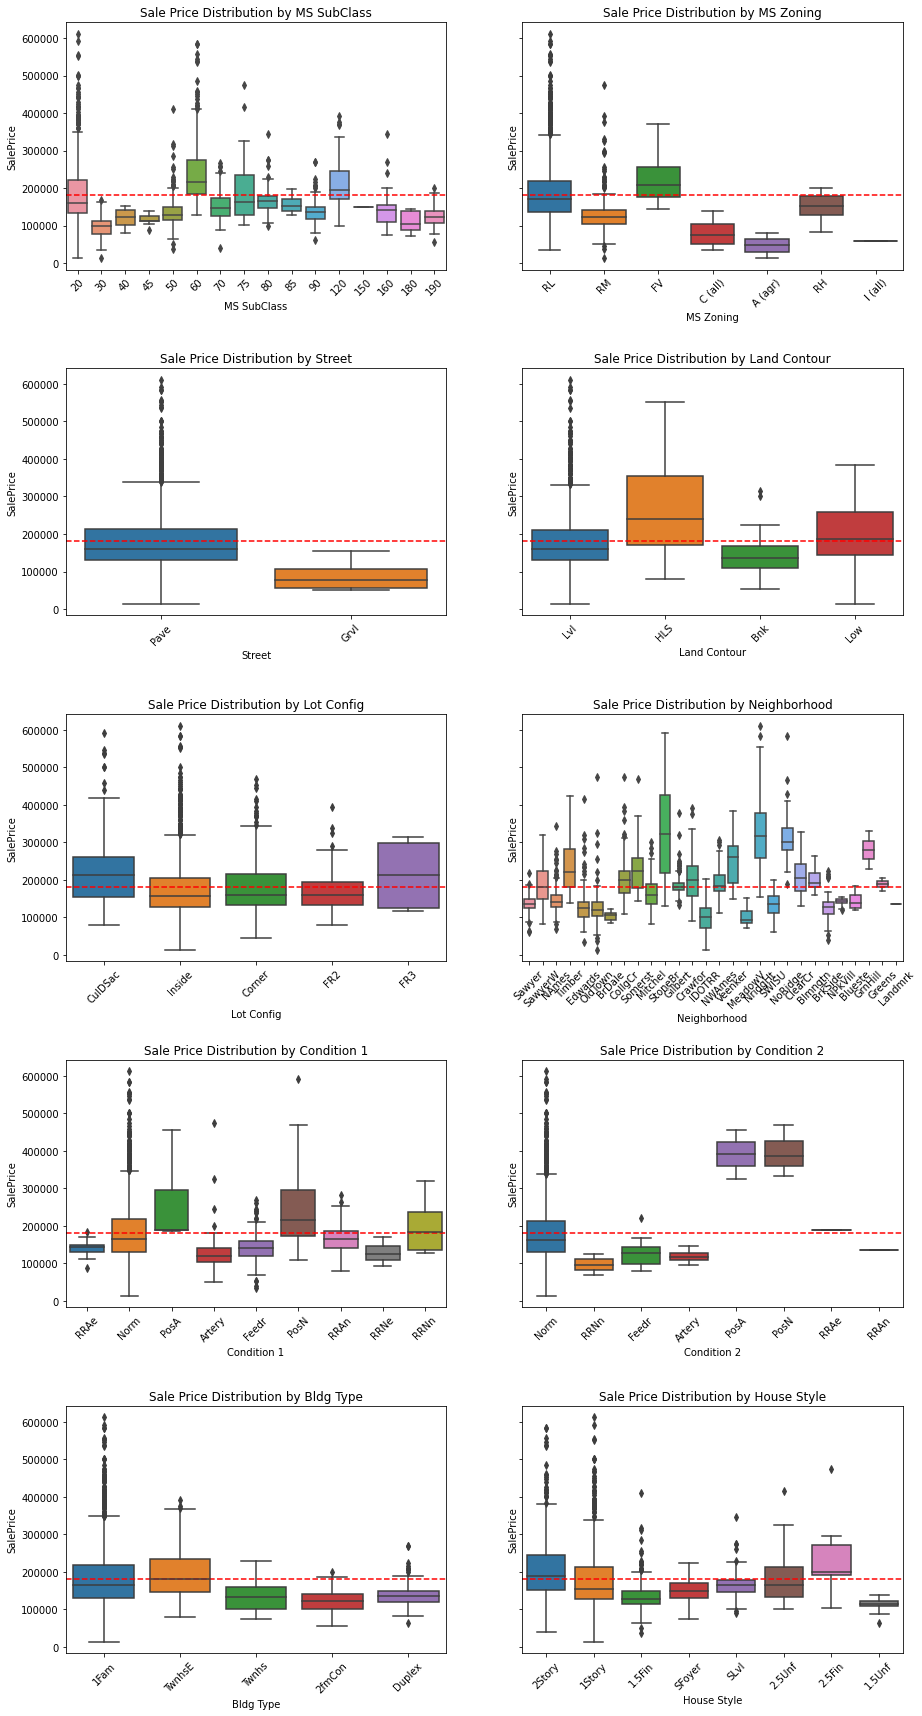

In [114]:
subplot_boxplot(ames, land)

OBSERVATION:

Looking at the breakdown of various land features, we will do an initial selection of features that might affect sale price significantly based on their median sale pricing as well as number of outliers. If a certain feature class has a median that is not close to the mean sale price, and it does not have too many outliers, we make an initial assumption that this particular feature class will impact the estimated sale price.

|Feature|Class selected for Feature Engineering|
|---|---|
|MS SubClass|40,180|
|MS Zoning|C(all), A(agr)|
|Street|Grvl|
|Lot Config|FR3|
|Neighborhood|Timber, Somerst, StoneBr, IDOTRR, Veenker, MeadowV, Greenhill, NoBidge, SWISU, NridgeHt|
|Condition 2|PosA, PosN|
|Bldg Type|Twnhs, 2fmCon|
|House Style|2.5Fin, 1.5Unf|

### 4.3 Ordinal Features

There are a total of 23 features that are ordinal in nature. We will investigate the impact of each class of the features and select those that appears to be more significant. We will then apply ordinal encoding or one-hot encoding to these features for our linear regression model later.

In [115]:
ordinal = ['Lot Shape','Utilities','Land Slope','Overall Qual','Overall Cond',
          'Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Bsmt Exposure',
          'BsmtFin Type 1','BsmtFin Type 2','Heating QC','Electrical','Kitchen Qual',
          'Functional','Fireplace Qu','Garage Finish','Garage Qual','Garage Cond',
          'Paved Drive','Pool QC','Fence']

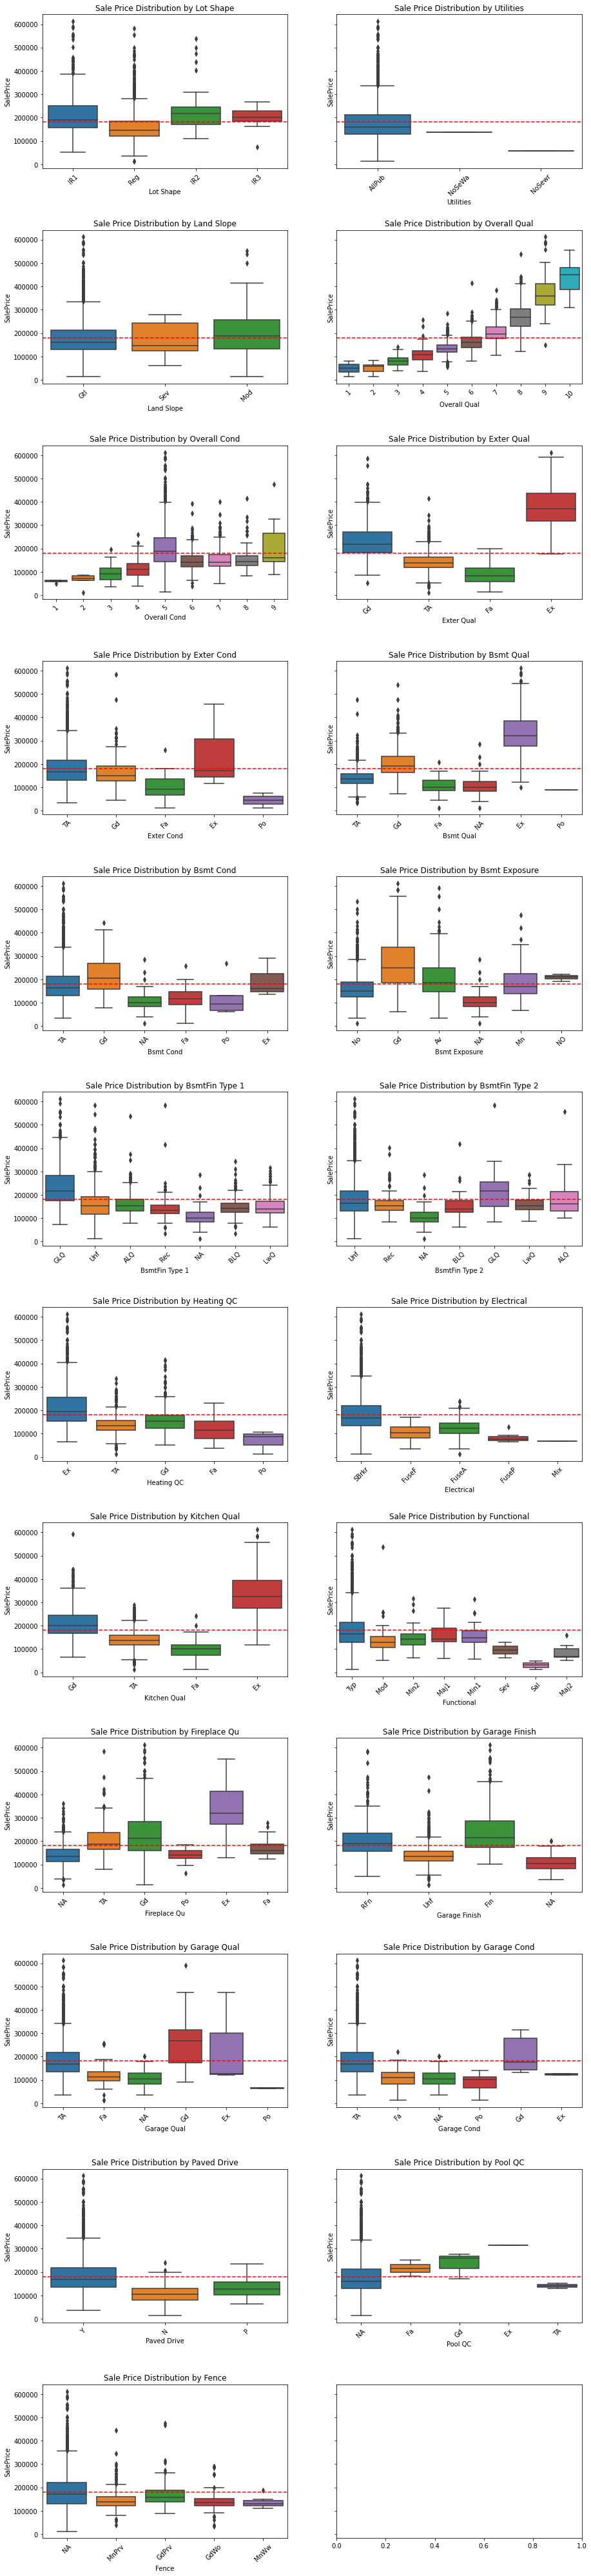

In [116]:
subplot_boxplot(ames, ordinal)

Features selected based on its distribution of prices in a particular class against the mean:

|Feature|Remarks|
|---|---|
|Overall Qual|keep as ordinal values|
|Exter Qual|Use ordinal encoding|
|Exter Cond (Fa, Po)|One-hot encoding|
|Bsmt Qual (Ex)|One-hot encoding|
|Bsmt Exposure (Gd, NO)| One-hot encoding|
|Heating QC (Fa, Po)|One-hot encoding|
|Electrical (FuseF, FuseP) | One-hot encoding|
|Kitchen Qual |Use ordinal encoding|
|Functional (Sev, Sal, Maj2)| one-hot encoding|
|Fireplace Qu(Ex) | One-hot encoding|
|Pool QC (Fa, Gd) | One-hot encoding|


In [117]:
# Creating a list of features that need one-hot encoding 
ordinal_dummies = ['Exter Cond','Bsmt Qual','Bsmt Exposure','Heating QC','Electrical',
                   'Functional','Fireplace Qu','Pool QC']
ames_new = pd.get_dummies(ames_new, columns=ordinal_dummies)
ames_new.head()

Id        PID  Lot Frontage  Lot Area Lot Shape Utilities Land Slope  \
0  109  533352170     79.581668     13517       IR1    AllPub        Gtl   
1  544  531379050     43.000000     11492       IR1    AllPub        Gtl   
2  153  535304180     68.000000      7922       Reg    AllPub        Gtl   
3  318  916386060     73.000000      9802       Reg    AllPub        Gtl   
4  255  906425045     82.000000     14235       IR1    AllPub        Gtl   

   Overall Qual  Overall Cond  Year Built  ...  Fireplace Qu_Fa  \
0             6             8        1976  ...                0   
1             7             5        1996  ...                0   
2             5             7        1953  ...                0   
3             5             5        2006  ...                0   
4             6             8        1900  ...                0   

  Fireplace Qu_Gd Fireplace Qu_NA Fireplace Qu_Po Fireplace Qu_TA Pool QC_Ex  \
0               0               1               0               0          0   
1               0               0               0               1          0   
2               0               1               0               0          0   
3               0               1               0               0          0   
4               0               1               0               0          0   

   Pool QC_Fa Pool QC_Gd Pool QC_NA Pool QC_TA  
0           0          0          1          0  
1           0          0          1          0  
2           0          0          1          0  
3           0          0          1          0  
4           0          0          1          0  

[5 rows x 199 columns]

In [118]:
# Check column names of features from one-hot encoding
ordinal_dict = {}

for feature in ordinal_dummies:
    ordinal_dict[feature] = [col for col in ames_new.columns if feature in col]

In [119]:
ordinal_dict[ordinal_dummies[0]]

['Exter Cond_Ex',
 'Exter Cond_Fa',
 'Exter Cond_Gd',
 'Exter Cond_Po',
 'Exter Cond_TA']

In [120]:
# Creating a dictionary to match the classes with their corresponding ordinal value
qual_dict = {
    'Ex':5,
    'Gd':4,
    'TA':3,
    'Fa':2,
    'Po':1
}

In [121]:
# Checking the count of each of Exter Qual feature's classes
ames_new['Exter Qual'].value_counts()

TA    1242
Gd     676
Ex      78
Fa      26
Name: Exter Qual, dtype: int64

In [122]:
# Mapping each class with its corrresponding ordinal value
ames_new['Exter Qual'] = ames_new['Exter Qual'].map(qual_dict)
ames_new['Exter Qual'].value_counts()

3    1242
4     676
5      78
2      26
Name: Exter Qual, dtype: int64

In [123]:
# Checking the count of each of Kitchen Qual feature's classes
ames_new['Kitchen Qual'].value_counts()

TA    1044
Gd     786
Ex     145
Fa      47
Name: Kitchen Qual, dtype: int64

In [124]:
# Mapping each class with its corrresponding ordinal value
ames_new['Kitchen Qual'] = ames_new['Kitchen Qual'].map(qual_dict)
ames_new['Kitchen Qual'].value_counts()

3    1044
4     786
5     145
2      47
Name: Kitchen Qual, dtype: int64

Text(0.5, 1.0, 'Frequency Distribution of Quality of material on exterior')

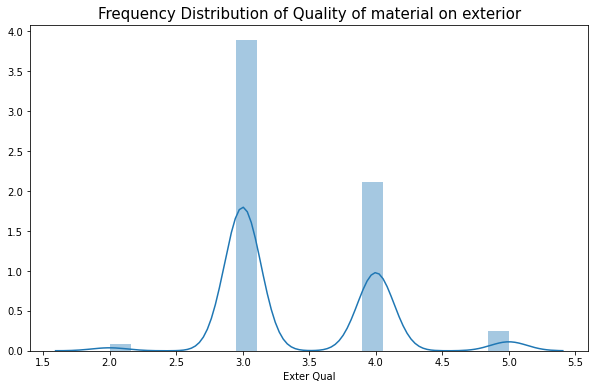

In [125]:
# Plot of frequency distribution of Exter Qual
plt.figure(figsize=(10,6))
sns.distplot(ames_new['Exter Qual']);
plt.title('Frequency Distribution of Quality of material on exterior', {'fontsize': 15})

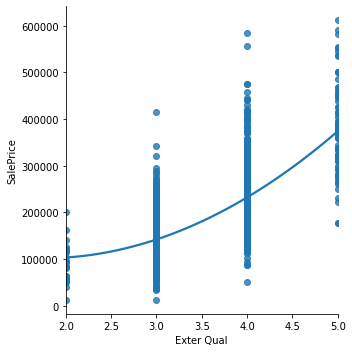

In [126]:
# Scatter plot for exter qual VS sale price with order 2
sns.lmplot(x='Exter Qual', y='SalePrice', data=ames_new, ci=False, order=2)

In [127]:
# Creating a new feature as the square of Exter Qual
ames_new['Exter Qual Sq'] = ames_new['Exter Qual']**2

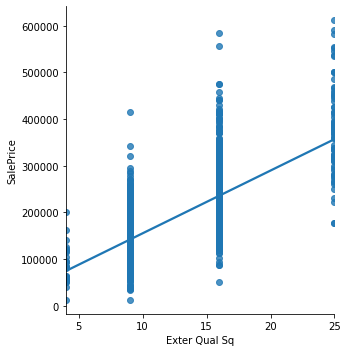

In [128]:
# Scatter plot for Exter Qual Sq VS Sale Price
sns.lmplot(x='Exter Qual Sq', y='SalePrice', data=ames_new, ci=False)

OBSERVATION:

Most of the properties has a rating of 3 or 4 for exterior quality, and from the scatter plot above, we can see that it has a correlation with sale price and order 2 is a better fit so we will keep this in mind when we do feature engineering later on.

Text(0.5, 1.0, 'Frequency Distribution of Kitchen Quality')

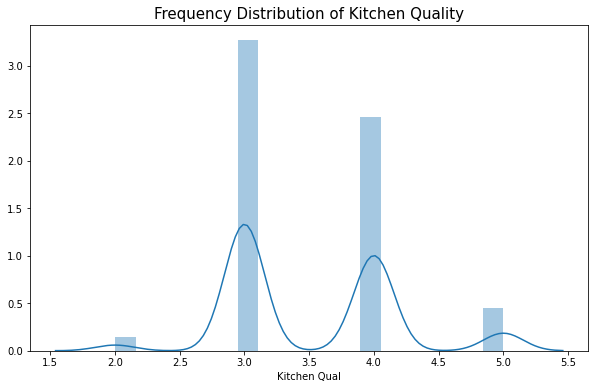

In [129]:
# Plot of frequency distribution of Kitchen Qual
plt.figure(figsize=(10,6))
sns.distplot(ames_new['Kitchen Qual']);
plt.title('Frequency Distribution of Kitchen Quality', {'fontsize': 15})

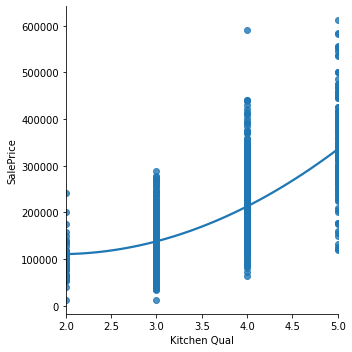

In [130]:
# Scatter plot for Kitchen Qual VS Sale Price with order 2
sns.lmplot(x='Kitchen Qual', y='SalePrice', data=ames_new, ci=False,order=2)

In [131]:
# Creating a new feature as the square of Kitchen Qual
ames_new['Kitchen Qual Sq'] = ames_new['Kitchen Qual']**2

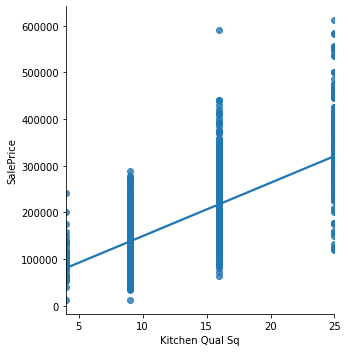

In [132]:
# Scatter plot for Kitchen Qual Sq VS Sale Price
sns.lmplot(x='Kitchen Qual Sq', y='SalePrice', data=ames_new, ci=False)

OBSERVATION:

For Exter Qual and Kitchen Qual, order 2 will be a better fit so we will use Exter Qual Sq and Kitchen Qual Sq as features instead.

### 4.4 Nominal Features

There are 10 other categorial features that we have not explored. 

In [133]:
nominal = ['Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type',
           'Foundation','Heating','Central Air','Garage Type','Sale Type']

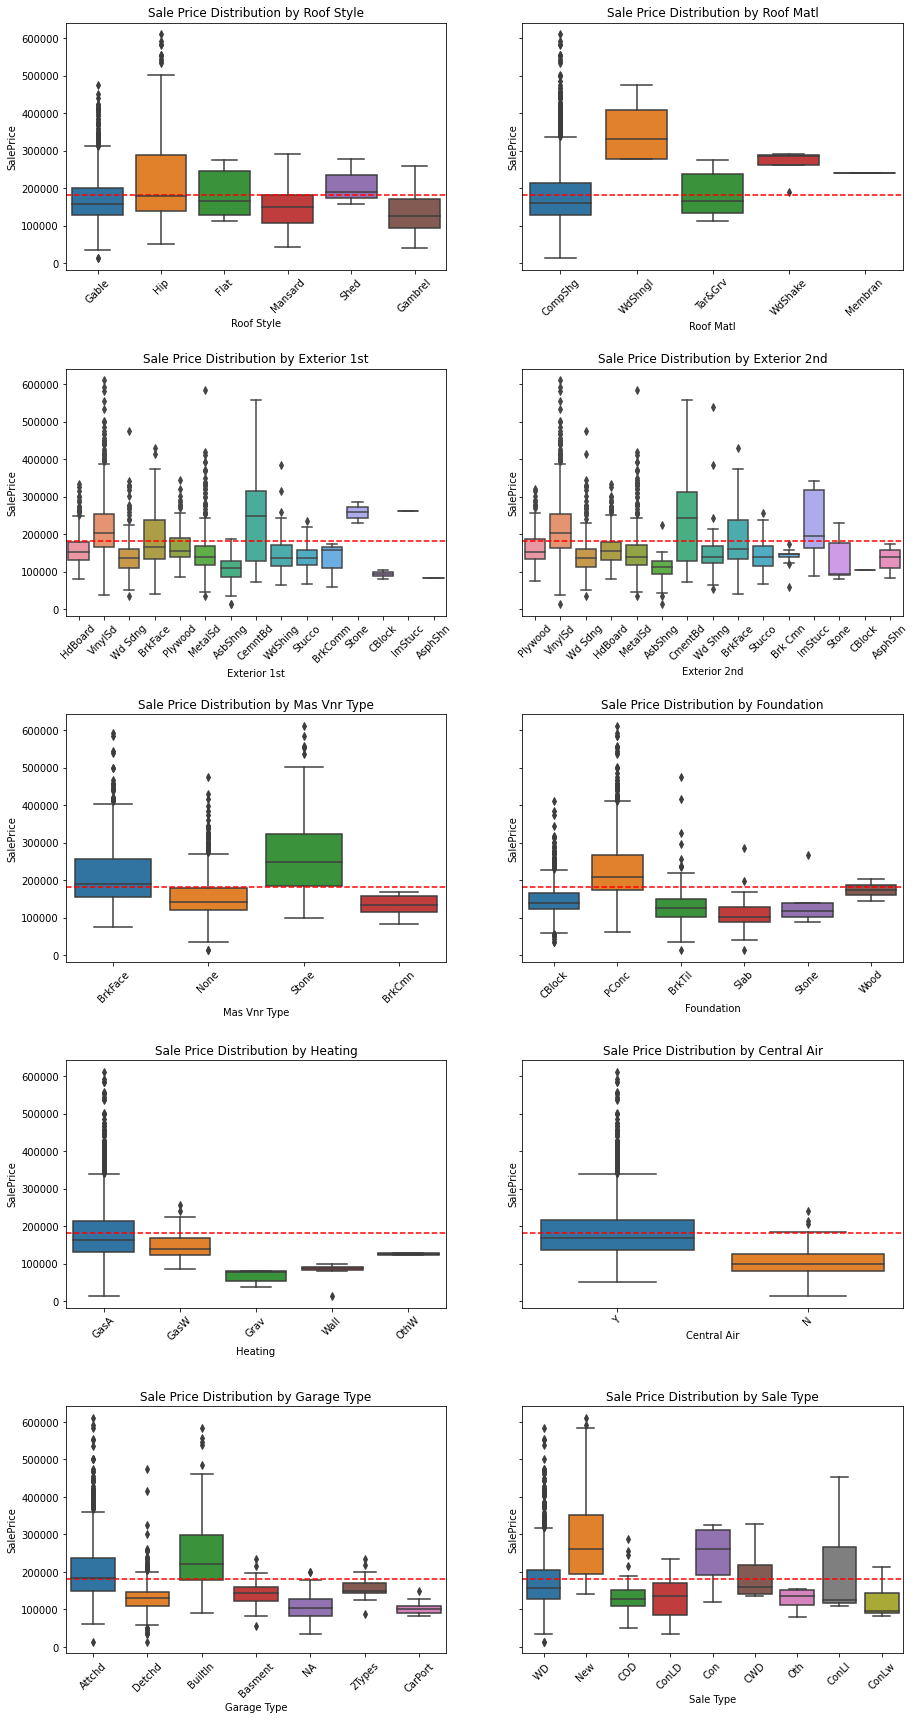

In [134]:
# Generating boxplot for the 10 categorial features
subplot_boxplot(ames, nominal)

OBSERVATION:

Comparing the mean and the distribution of sale prices of properties in different classes of each feature, we will select those that will impact on the sale price for our linear regression model and perform one-hot encoding for these features.

|Feature|Class selected for Feature Engineering|
|---|---|
|Roof Matl|Wdshngl|
|Exterior 1st|Stone, CBlock|
|Heating|Grav|
|Central Air|N|
|Sale Type|New, Con, ConLD, ConLw|

In [135]:
# Creating dummies for features that requires one-hot encoding
nominal_dummies = ['Roof Matl','Exterior 1st','Heating','Central Air','Sale Type']
ames_new = pd.get_dummies(ames_new, columns=nominal_dummies)
ames_new.head()

Id        PID  Lot Frontage  Lot Area Lot Shape Utilities Land Slope  \
0  109  533352170     79.581668     13517       IR1    AllPub        Gtl   
1  544  531379050     43.000000     11492       IR1    AllPub        Gtl   
2  153  535304180     68.000000      7922       Reg    AllPub        Gtl   
3  318  916386060     73.000000      9802       Reg    AllPub        Gtl   
4  255  906425045     82.000000     14235       IR1    AllPub        Gtl   

   Overall Qual  Overall Cond  Year Built  ...  Central Air_Y Sale Type_COD  \
0             6             8        1976  ...              1             0   
1             7             5        1996  ...              1             0   
2             5             7        1953  ...              1             0   
3             5             5        2006  ...              1             0   
4             6             8        1900  ...              1             0   

  Sale Type_CWD Sale Type_Con  Sale Type_ConLD  Sale Type_ConLI  \
0             0             0                0                0   
1             0             0                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

  Sale Type_ConLw Sale Type_New Sale Type_Oth  Sale Type_WD   
0               0             0             0              1  
1               0             0             0              1  
2               0             0             0              1  
3               0             0             0              1  
4               0             0             0              1  

[5 rows x 232 columns]

### Numerical Features

There are 26 other numerical features.

In [136]:
numerical = ['Year Built','Year Remod/Add','Low Qual Fin SF','Bsmt Full Bath','Bsmt Half Bath',
            'Full Bath','Half Bath','Bedroom AbvGr','Kitchen AbvGr','TotRms AbvGrd','Fireplaces',
            'Garage Yr Blt','Garage Cars','Wood Deck SF','Open Porch SF','Enclosed Porch',
            '3Ssn Porch','Screen Porch','Pool Area','Misc Val','Mo Sold','Yr Sold','SalePrice']

In [137]:
# Looking at the statistics for the 26 numerical features
ames[numerical].describe().transpose()

count           mean           std      min       25%  \
Year Built       2022.0    1971.360040     30.170880   1872.0    1953.0   
Year Remod/Add   2022.0    1983.943126     21.030296   1950.0    1964.0   
Low Qual Fin SF  2022.0       5.591988     51.429666      0.0       0.0   
Bsmt Full Bath   2022.0       0.425321      0.521779      0.0       0.0   
Bsmt Half Bath   2022.0       0.063304      0.251563      0.0       0.0   
Full Bath        2022.0       1.571217      0.548149      0.0       1.0   
Half Bath        2022.0       0.367953      0.499502      0.0       0.0   
Bedroom AbvGr    2022.0       2.844708      0.827304      0.0       2.0   
Kitchen AbvGr    2022.0       1.043027      0.210154      0.0       1.0   
TotRms AbvGrd    2022.0       6.429278      1.546474      2.0       5.0   
Fireplaces       2022.0       0.585559      0.634135      0.0       0.0   
Garage Yr Blt    2022.0    1868.731949    453.281804      0.0    1957.0   
Garage Cars      2022.0       1.772502      0.765844      0.0       1.0   
Wood Deck SF     2022.0      93.763600    128.446985      0.0       0.0   
Open Porch SF    2022.0      46.796736     65.585331      0.0       0.0   
Enclosed Porch   2022.0      22.697824     59.957087      0.0       0.0   
3Ssn Porch       2022.0       2.628586     25.408061      0.0       0.0   
Screen Porch     2022.0      16.748269     57.750032      0.0       0.0   
Pool Area        2022.0       2.194857     36.537911      0.0       0.0   
Misc Val         2022.0      43.659248    437.228262      0.0       0.0   
Mo Sold          2022.0       6.204748      2.737324      1.0       4.0   
Yr Sold          2022.0    2007.780415      1.315327   2006.0    2007.0   
SalePrice        2022.0  180762.604847  79109.004181  12789.0  129500.0   

                      50%        75%       max  
Year Built         1973.5    2000.00    2010.0  
Year Remod/Add     1993.0    2004.00    2010.0  
Low Qual Fin SF       0.0       0.00    1064.0  
Bsmt Full Bath        0.0       1.00       3.0  
Bsmt Half Bath        0.0       0.00       2.0  
Full Bath             2.0       2.00       4.0  
Half Bath             0.0       1.00       2.0  
Bedroom AbvGr         3.0       3.00       8.0  
Kitchen AbvGr         1.0       1.00       3.0  
TotRms AbvGrd         6.0       7.00      14.0  
Fireplaces            1.0       1.00       4.0  
Garage Yr Blt      1978.0    2001.00    2010.0  
Garage Cars           2.0       2.00       5.0  
Wood Deck SF          0.0     168.00    1424.0  
Open Porch SF        26.0      69.75     547.0  
Enclosed Porch        0.0       0.00     432.0  
3Ssn Porch            0.0       0.00     508.0  
Screen Porch          0.0       0.00     490.0  
Pool Area             0.0       0.00     800.0  
Misc Val              0.0       0.00   12500.0  
Mo Sold               6.0       8.00      12.0  
Yr Sold            2008.0    2009.00    2010.0  
SalePrice        161000.0  213000.00  611657.0

<AxesSubplot:>

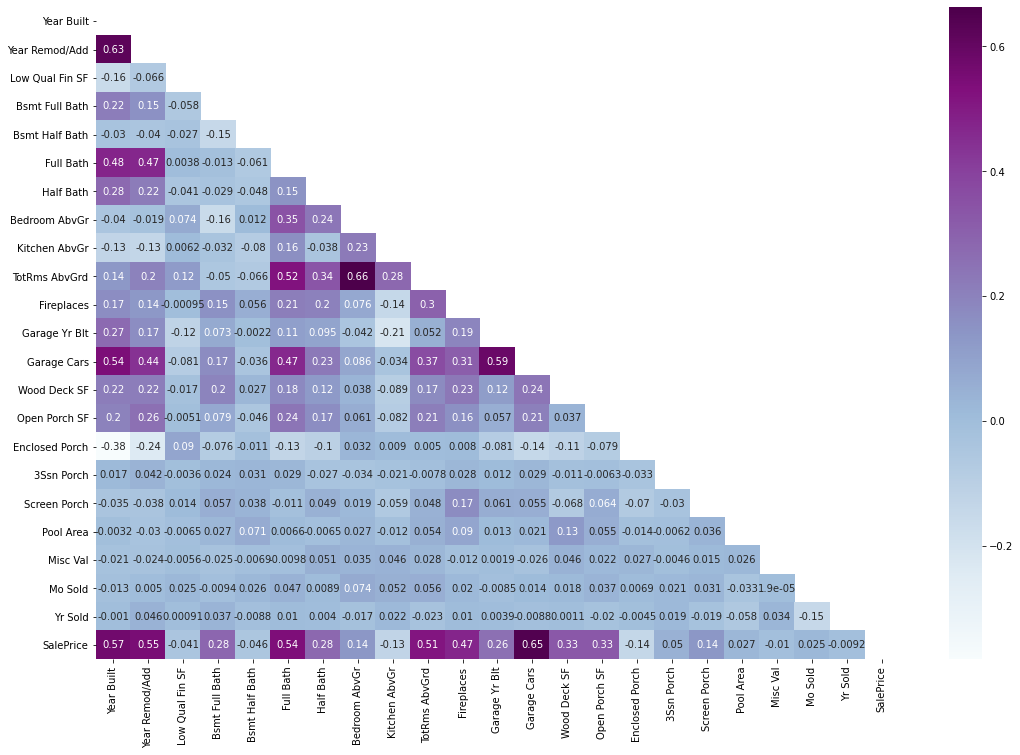

In [138]:
# Using a heatmap to have a quick glance at the correlationship between the numerical features
plt.figure(figsize=(18,12))
mask = np.zeros_like(ames[numerical].corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(ames[numerical].corr(),mask=mask,annot=True,cmap="BuPu")

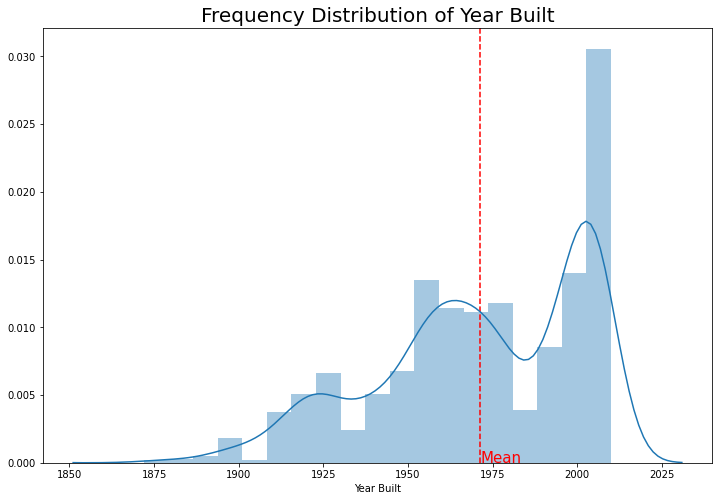

In [139]:
plot_hist(ames, 'Year Built')

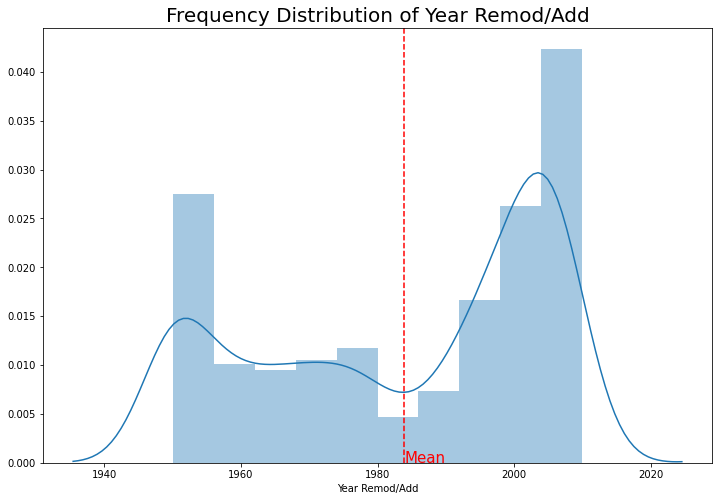

In [140]:
plot_hist(ames, 'Year Remod/Add')

Comparing the histogram of Year Built and Year Remod/Add, it is noted that all properties built before 1950 have been remodeled. There is also an increasing upward trend of new properties over the years.

In [141]:
# Creating scatter plot subplots to see the distributions of various features

def subplot_scatter(df, col_list):
    nrows = int(np.ceil(len(col_list)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,nrows*6), sharey=True)
    ax = ax.ravel()
    plt.subplots_adjust(hspace=0.4)
    for i, column in enumerate(col_list):
         sns.regplot(x=column, y='SalePrice', data=df,ax=ax[i],scatter_kws={"color": "skyblue"}, line_kws={"color": "black"})
         ax[i].title.set_text('Correlation between {} & Sale Price'.format(column))


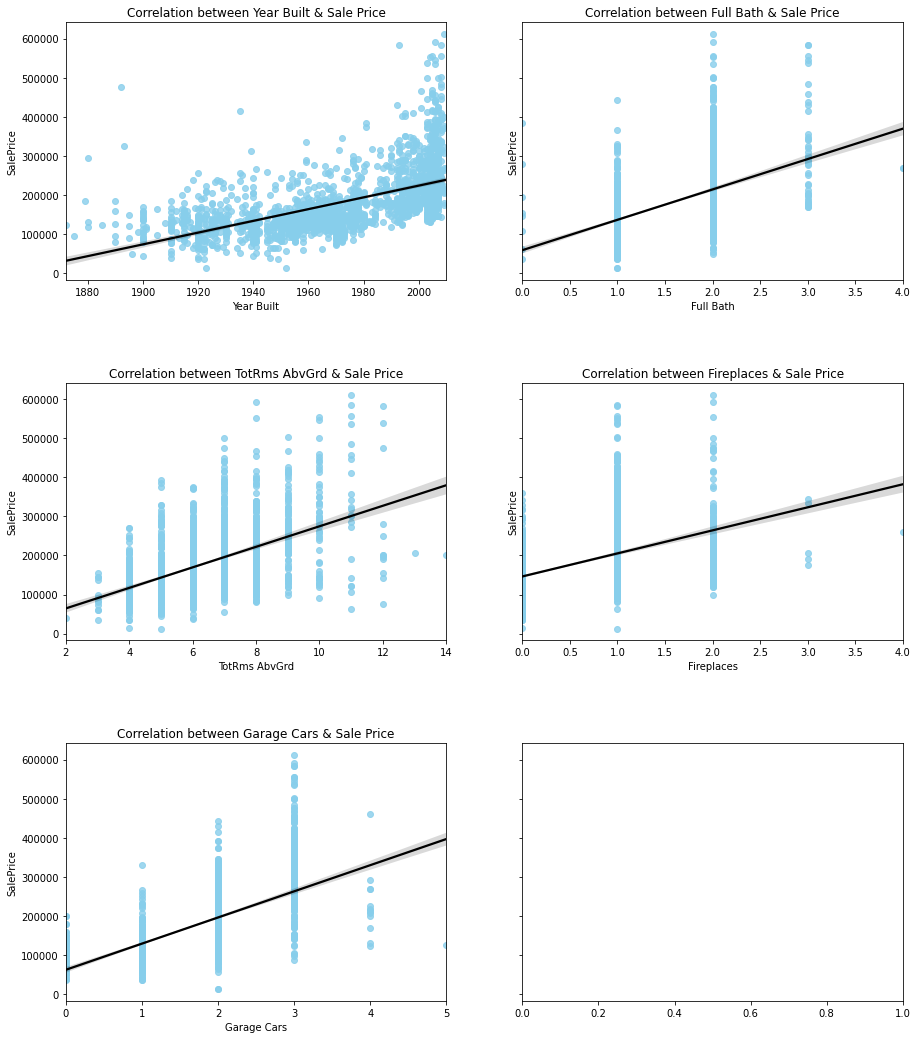

In [142]:
numerical_features = ['Year Built','Full Bath','TotRms AbvGrd','Fireplaces','Garage Cars']
subplot_scatter(ames_new, numerical_features)

'Year Built','Full Bath','TotRms AbvGrd','Fireplaces' and 'Garage Cars' are chosen as they have the highest correlation with sale prices compared to other numerical features.

#### Summary

|Features|Correlation coefficient|
|---|---|
|'SalePrice' & 'Overall Qual'| 0.803|
|'SalePrice' & 'Year Built'| 0.573|
|'SalePrice' & 'Year Remod/Add'| 0.55|
|'SalePrice' & 'Mas Vnr Area'| 0.52|
|'SalePrice' & 'Total Bsmt SF'| 0.666|
|'SalePrice' & '1st Flr SF'| 0.65|
|'SalePrice' & 'Gr Liv Area'| 0.72|
|'SalePrice' & 'Full Bath'| 0.538|
|'SalePrice' & 'TotRms AbvGrd'| 0.513|
|'SalePrice' & 'Garage Cars'| 0.648|
|'SalePrice' & 'Garage Area'| 0.654|


Referring to the overview correlation table that we have created earlier on, we will consolidate all shortlisted features for our linear model and list them below.

Numerical: 'Gr Liv Area', 'Mas Vnr Area', 'Total Bsmt SF', 'Garage Area', 'Year Built', 'Full Bath', 'TotRms AbvGrd', 'Fireplaces' and 'Garage Cars'

Cateogorial: 'Overall Qual', 'MS SubClass_40', 'MS SubClass_180', 'MS Zoning_C (all)', 'MS Zoning_A (agr)', 'Street_Grvl', 'Lot Config_FR3', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Neighborhood_GrnHill', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_SWISU', 'Condition 2_PosA', 'Condition 2_PosN', 'Bldg Type_2fmCon', 'Bldg Type_Twnhs', 'House Style_2.5Fin', 'House Style_1.5Unf', 'Exter Qual Sq', 'Kitchen Qual Sq', 'Exter Cond_Po', 'Exter Cond_Fa', 'Bsmt Qual_Ex', 'Bsmt Qual_Gd', ''Bsmt Exposure_NO', 'Heating QC_Fa', 'Heating QC_Po', 'Electrical_FuseF', 'Electrical_FuseP', 'Functional_Sal', 'Functional_Sev', 'Functional_Maj2', ''Fireplace Qu_Ex', 'Pool QC_Fa', 'Pool QC_Gd'

In total, we have initially shortlist 9 continuous features as well as 40 categorial features for building our linear regression model.

## 5. Linear Regression Model & Evaluation

### Test Model 1

Using only the continuous numerical features as a base, we build our first model for testing.

In [143]:
# Defining features and output for test model 1
X1 = ames_new[['Gr Liv Area', 'Mas Vnr Area', 'Total Bsmt SF', 'Garage Area', 'Year Built', 
       'Full Bath', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars']]
y = ames_new['SalePrice']

In [144]:
# Using train_test_split on test model 1
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1, y)

In [145]:
X_train1.shape

(1516, 9)

In [146]:
X_test1.shape

(506, 9)

In [147]:
y_train1.shape

(1516,)

In [148]:
# Scaling and standardize our data
ss = StandardScaler()
ss.fit(X_train1)
X_train1_scaled = ss.transform(X_train1)
X_test1_scaled = ss.transform(X_test1)

In [149]:
# Creating Linear Regression Model for test model 1
lr1 = LinearRegression()
lr1.fit(X_train1_scaled,y_train1)
lr1.score(X_train1_scaled,y_train1)

0.7899537589836169

In [150]:
lr1.score(X_test1_scaled,y_test1)

0.8257372030758002

In [151]:
# Use cross validation to evaluate test model 1
cross_val_score(lr1, X_train1_scaled, y_train1, cv=5).mean()

0.785211911254909

In [152]:
# Finding the RMSE for test model 1
y_pred1 = lr1.predict(X_train1_scaled)
np.sqrt(metrics.mean_squared_error(y_train1,y_pred1))

36654.38576142289

### Test Model 2

Fit in the rest of categorial features to do a comparison with test model 1.

In [153]:
# Defining features and output for test model 2
X2 = ames_new[['Gr Liv Area', 'Mas Vnr Area', 'Total Bsmt SF', 'Garage Area', 'Year Built', 
       'Full Bath', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars','Overall Qual', 'MS SubClass_40', 
       'MS SubClass_180', 'MS Zoning_C (all)', 'MS Zoning_A (agr)', 'Street_Grvl', 'Lot Config_FR3', 
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 
       'Neighborhood_GrnHill', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 
       'Neighborhood_NridgHt', 'Neighborhood_SWISU','Condition 2_PosA', 'Condition 2_PosN', 'Bldg Type_2fmCon', 
       'Bldg Type_Twnhs', 'House Style_2.5Fin', 'House Style_1.5Unf', 'Exter Qual Sq', 'Kitchen Qual Sq', 
       'Exter Cond_Po', 'Exter Cond_Fa', 'Bsmt Qual_Ex', 'Bsmt Qual_Gd', 'Bsmt Exposure_NO', 'Heating QC_Fa', 
       'Heating QC_Po', 'Electrical_FuseF', 'Electrical_FuseP', 'Functional_Sal', 'Functional_Sev', 
       'Functional_Maj2', 'Fireplace Qu_Ex', 'Pool QC_Fa', 'Pool QC_Gd']]
y = ames_new['SalePrice']

In [154]:
# Using train_test_split on test model 2
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2, y)

In [155]:
X_train2.shape

(1516, 49)

In [156]:
# Scaling and standardize our data
ss2 = StandardScaler()
ss2.fit(X_train2)
X_train2_scaled = ss2.transform(X_train2)
X_test2_scaled = ss2.transform(X_test2)

In [157]:
# Creating Linear Regression Model for test model 2
lr2 = LinearRegression()
lr2.fit(X_train2_scaled,y_train2)
lr2.score(X_train2_scaled,y_train2)

0.888008355457743

In [158]:
lr2.score(X_test2_scaled,y_test2)

-3.5890542064405595e+23

In [159]:
# Use cross validation to evaluate test model 2
cross_val_score(lr2, X_train2_scaled, y_train2, cv=5).mean()

-2.4231629803788964e+23

In [160]:
# Finding the RMSE for test model 1
y_pred2 = lr2.predict(X_train2_scaled)
np.sqrt(metrics.mean_squared_error(y_train2,y_pred2))

26416.361927527178

### Test Model 3

After after all the features in test model 2, initially we obtained a good score for the train and test model as well as a lower RMSE, but upon doing cross validation, sometimes the model do not fit at all and returned a negative R2 score. We will perform a Ridge Regression to regularize our test model 2.

In [161]:
# Creating a range of values to test for optimal alpha value
r_alphas = np.logspace(0, 5, 100)

In [162]:
ridge = RidgeCV(alphas=r_alphas, store_cv_values=True)
ridge = ridge.fit(X_train2_scaled, y_train2)

In [163]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge.alpha_
ridge_optimal_alpha

36.78379771828632

In [164]:
ridge_opt = Ridge(alpha=ridge_optimal_alpha)
cross_val_score(ridge_opt, X_train2_scaled, y_train2, cv=5, scoring='r2').mean()

0.8721010855447473

In [165]:
np.sqrt((-cross_val_score(ridge_opt, X_train2_scaled, y_train2, cv=5, scoring='neg_mean_squared_error').mean()))

27861.734365533117

In [166]:
ridge_opt.fit(X_train2_scaled, y_train2)

Ridge(alpha=36.78379771828632)

In [167]:
ridge_opt.score(X_train2_scaled, y_train2)

0.8877607697611577

In [168]:
ridge_opt.score(X_test2_scaled, y_test2)

0.8703796241458346

In [169]:
ridge_opt.coef_

array([21311.6477043 ,  4048.52888733, 12601.8345648 ,  8002.89074442,
        7500.25521964, -1860.03814238,   282.74807797,  7483.89157626,
       -1223.4369887 ,  9984.35181135,  -367.16221488,  1515.68406841,
        -775.27964277,  -153.04965121,  -465.89016608,   -92.04786169,
        1438.21566788,  5299.45118282,   900.05729145,   765.94458264,
        2784.49478995,  -317.09119106,  -853.91314364,  3302.18509354,
        5340.24206976,   323.08965309,  1992.50773662,    79.86574064,
         199.03450312, -3786.11825589, -1464.66597989,   330.79975192,
        7293.07275021,  8651.7383822 ,  -301.89448069,  -892.3634009 ,
        9824.16388675,   -82.63028109,  -349.87630141,   171.04668127,
          81.1656722 ,  -256.26972155,   -66.85562104,  -153.04965121,
           0.        , -1102.75358567,  1787.12048799,  -243.44003219,
         530.74245029])

### Test Model 4

This time, we will use Lasso Regression to regularize test model 2.

In [170]:
l_alphas = np.arange(100, 1000, 0.5)
lasso_model = LassoCV(alphas=l_alphas, cv=5)
lasso_model = lasso_model.fit(X_train2_scaled, y_train2)

In [171]:
# Obtain the optimal value of alpha
lasso_optimal_alpha = lasso_model.alpha_
lasso_optimal_alpha

814.5

In [172]:
lasso_opt = Lasso(alpha=lasso_optimal_alpha)
cross_val_score(lasso_model, X_train2_scaled, y_train2, cv=5, scoring='r2').mean()

0.8744875416844387

In [173]:
np.sqrt(-cross_val_score(lasso_model, X_train2_scaled, y_train2, cv=5, scoring='neg_mean_squared_error').mean())

27604.956241869888

In [174]:
lasso_opt.fit(X_train2_scaled, y_train2)
lasso_opt.score(X_train2_scaled, y_train2)

0.8852251315384009

In [175]:
lasso_opt.score(X_test2_scaled, y_test2)

0.8721409089500358

In [176]:
lasso_opt.coef_

array([20529.41771336,  3848.24303402, 13036.36985887,  7217.90430432,
        6588.87863705,    -0.        ,     0.        ,  7198.07630855,
           0.        , 10797.73093214,    -0.        ,   299.18601657,
        -216.57763862,    -0.        ,    -0.        ,    -0.        ,
           0.        ,  4229.91792471,     0.        ,     0.        ,
        2068.35846657,  -144.99329484,    -0.        ,  2412.75218604,
        4040.81744501,     0.        ,  1175.44010005,     0.        ,
          -0.        , -2875.37547594,  -552.15589057,     0.        ,
        7538.20248556,  8836.13321146,    -0.        ,  -202.9607804 ,
        9948.41023226,     0.        ,    -0.        ,    -0.        ,
          -0.        ,    -0.        ,    -0.        ,    -0.        ,
           0.        ,  -289.98675216,  1129.27245962,    -0.        ,
           0.        ])

The performance of lasso and ridge return similar results in performance, and by using lasso regression, it has helped to eliminate 20 undesirables features. In this case, lasso regression is preferred since we have too many features.

### Test Model 5

Feature engineering, we have taken out 20 features, and we shall relook at the distributions of the removed features as well as the selected to gain a better insight into creating better features.

In [177]:
# Defining features and output for test model 5
X5 = ames_new[['Gr Liv Area', 'Mas Vnr Area', 'Total Bsmt SF', 'Garage Area', 
               'Year Built', 'Full Bath', 'Fireplaces', 'Overall Qual', 
               'MS SubClass_60', 'Land Contour_HLS', 'MS Zoning_FV',
               'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 
               'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Condition 1_PosA', 
               'Condition 1_PosN', 'Condition 2_PosA', 'Condition 2_PosN', 'Bldg Type_Twnhs',
               'Overall Cond', 'Exter Cond_Ex', 'Bsmt Exposure_Gd',
               'House Style_2.5Fin', 'Exter Qual Sq', 'Kitchen Qual Sq', 'Heating QC_Ex',
               'Bsmt Qual_Ex', 'Functional_Maj2', 'Fireplace Qu_Ex']]
y = ames_new['SalePrice']
#'Neighborhood_GrnHill', 'Functional_Sev', 'Pool QC_Gd', 'Lot Config_FR3' removed

In [178]:
# Train-test-split for group 5 features
X_train5,X_test5,y_train5,y_test5 = train_test_split(X5, y)

In [179]:
# Scaling and standardize our data
ss5 = StandardScaler()
ss5.fit(X_train5)
X_train5_scaled = ss5.transform(X_train5)
X_test5_scaled = ss5.transform(X_test5)

In [180]:
l_alphas5 = np.arange(100, 1000, 0.5)
lasso_model5 = LassoCV(alphas=l_alphas5, random_state=42, cv=5)
lasso_model5 = lasso_model5.fit(X_train5_scaled, y_train5)

In [181]:
# Obtain the optimal value of alpha
lasso_optimal_alpha5 = lasso_model5.alpha_
lasso_optimal_alpha5

701.0

In [182]:
lasso_opt5 = Lasso(alpha=lasso_optimal_alpha5)
cross_val_score(lasso_model5, X_train5_scaled, y_train5, cv=5, scoring='r2').mean()

0.8931112849344973

In [183]:
np.sqrt(-cross_val_score(lasso_model5, X_train5_scaled, y_train5, cv=5, scoring='neg_mean_squared_error').mean())

25665.74521602652

In [184]:
lasso_opt5.fit(X_train5_scaled, y_train5)
lasso_opt5.score(X_train5_scaled, y_train5)

0.9014428551410716

In [185]:
lasso_opt5.score(X_test5_scaled, y_test5)

0.8756640401367848

In [186]:
lasso_opt5.coef_

array([22062.08939052,  3514.800116  , 12884.41828422,  7096.47221675,
        9719.75056549,    -0.        ,  6029.97651929,  7840.40751031,
         458.33028326,  2610.70220822,     0.        ,  1254.92291216,
        3073.81162747,     0.        ,     0.        ,  4045.67494427,
        2868.69790716,   362.61893084,   902.16127696,   329.42749693,
          -0.        , -1997.23079393,  6483.48233068,     0.        ,
        6460.8104095 ,     0.        ,  7594.76787385,  6891.70195475,
        1593.90366019, 10648.82397821,    -0.        ,   824.50144312])

### Test Model 6

In [187]:
ames_new['Year Built Sq'] = ames_new['Year Built']**2
ames_new['Overall Qual Sq'] = ames_new['Overall Qual']**2

In [188]:
ames_new['Neighborhood_Ex'] = ames_new['Neighborhood_StoneBr']+ames_new['Neighborhood_NoRidge']+ames_new['Neighborhood_NridgHt']+ames_new['Neighborhood_GrnHill']
ames_new['Neighborhood_Gd'] = ames_new['Neighborhood_Timber']+ames_new['Neighborhood_Somerst']+ames_new['Neighborhood_Veenker']
ames_new['Functional_Po'] = ames_new['Functional_Maj2']+ames_new['Functional_Sev']


In [189]:
X6 = ames_new[['Gr Liv Area', 'Mas Vnr Area', 'Total Bsmt SF', 'Garage Area', 
               'Year Built Sq', 'Full Bath', 'Fireplaces', 'Overall Qual Sq', 
               'MS SubClass_60', 'Land Contour_HLS', 'MS Zoning_FV', 'Neighborhood_Ex', 
               'Neighborhood_Gd', 'Condition 1_PosN', 'Condition 2_PosA', 'Condition 2_PosN', 
               'Bldg Type_Twnhs', 'Fireplace Qu_Ex', 'Functional_Po', 'Bsmt Qual_Ex',
               'Overall Cond', 'Bsmt Exposure_Gd', 'House Style_2.5Fin', 'Exter Qual Sq', 
               'Kitchen Qual Sq', 'Heating QC_Ex' ]]
y = ames_new['SalePrice']

In [190]:
# Train-test-split for group 5 features
X_train6,X_test6,y_train6,y_test6 = train_test_split(X6, y)

In [191]:
# Scaling and standardize our data
ss6 = StandardScaler()
ss6.fit(X_train6)
X_train6_scaled = ss6.transform(X_train6)
X_test6_scaled = ss6.transform(X_test6)

In [192]:
l_alphas6 = np.arange(100, 1000, 0.5)
lasso_model6 = LassoCV(alphas=l_alphas6, cv=5,random_state=42)
lasso_model6 = lasso_model6.fit(X_train6_scaled, y_train6)

In [193]:
# Obtain the optimal value of alpha
lasso_optimal_alpha6 = lasso_model6.alpha_
lasso_optimal_alpha6

804.0

In [194]:
lasso_opt6 = Lasso(alpha=lasso_optimal_alpha6)
cross_val_score(lasso_model6, X_train6_scaled, y_train6, cv=5, scoring='r2').mean()

0.8878202618698617

In [195]:
np.sqrt(-cross_val_score(lasso_model6, X_train6_scaled, y_train6, cv=5, scoring='neg_mean_squared_error').mean())

25966.49982757337

In [196]:
lasso_opt6.fit(X_train6_scaled, y_train6)
lasso_opt6.score(X_train6_scaled, y_train6)

0.8962728900515985

In [197]:
lasso_opt6.score(X_test6_scaled, y_test6)

0.9032851291492999

In [198]:
lasso_opt6.coef_

array([21549.38008558,  2570.49915574, 11515.51505167,  6539.70013745,
        9548.56591162,    -0.        ,  5318.10935196, 12973.47371286,
        1014.96930146,  2448.46577166,  1076.27882471,  7548.34658876,
         110.57718063,   689.11660761,   458.16710945,     0.        ,
       -2866.58457064,   489.30250351,    -0.        ,  7290.39112158,
        6771.32002485,  6909.57765818,     0.        ,  5263.5733279 ,
        6684.71064488,  1203.54725476])

### Test Model 7

In [199]:
X7 = ames_new[['Gr Liv Area', 'Mas Vnr Area', 'Total Bsmt SF', 'Garage Area', 
               'Year Built', 'Full Bath', 'Fireplaces', 'Overall Qual', 
               'MS SubClass_60', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 
               'Neighborhood_Timber', 'Neighborhood_Veenker', 'Neighborhood_NoRidge', 
               'Neighborhood_NridgHt','Condition 2_PosA', 'Condition 2_PosN', 'Bldg Type_Twnhs', 
               'House Style_2.5Fin', 'Exter Qual Sq', 'Kitchen Qual Sq', 'Exter Cond_Fa', 
               'Bsmt Qual_Ex', 'Functional_Maj2', 'Fireplace Qu_Ex']]
y = ames_new['SalePrice']
##'Functional_Sev', 'Lot Config_FR3', 'Neighborhood_GrnHill' removed

In [200]:
X_train7,X_test7,y_train7,y_test7 = train_test_split(X7, y, random_state=42)

In [201]:
# Scaling and standardize our data
ss7 = StandardScaler()
ss7.fit(X_train7)
X_train7_scaled = ss7.transform(X_train7)
X_test7_scaled = ss7.transform(X_test7)

In [202]:
# Creating a range of values to test for optimal alpha value
r_alphas = np.logspace(0, 5, 100)

In [203]:
ridge7 = RidgeCV(alphas=r_alphas, store_cv_values=True)
ridge7 = ridge7.fit(X_train7_scaled, y_train7)

In [204]:
# Here is the optimal value of alpha
ridge_optimal_alpha7 = ridge7.alpha_
ridge_optimal_alpha7

41.32012400115337

In [205]:
ridge_opt7 = Ridge(alpha=ridge_optimal_alpha7)
cross_val_score(ridge_opt7, X_train7_scaled, y_train7, cv=5, scoring='r2').mean()

0.8771587779154585

In [206]:
np.sqrt((-cross_val_score(ridge_opt7, X_train7_scaled, y_train7, cv=5, scoring='neg_mean_squared_error').mean()))

27353.947045031447

In [207]:
ridge_opt7.fit(X_train7_scaled, y_train7)

Ridge(alpha=41.32012400115337)

In [208]:
ridge_opt7.score(X_train7_scaled, y_train7)

0.8856375911864913

In [209]:
ridge_opt7.score(X_test7_scaled, y_test7)

0.8698478563862765

In [210]:
ridge_opt7.coef_

array([20814.71438877,  3608.61884317, 13526.04622881,  7290.00615445,
        7047.48492517, -1664.18485029,  7204.16939343, 10652.72552644,
        1748.75591504,  1011.80684452,  3970.57866551,   790.8851596 ,
         962.35370024,  3768.9395055 ,  4247.36577217,  1350.12931845,
         726.62019804, -3363.26173931,  1533.20872043,  6231.59731362,
        9184.64791181, -1914.92398142, 10066.44765252,  -826.72612729,
         -85.74985748])

### Model Evaluation

|Model|R2 mean|	RMSE	|train R2|	test R2|
|---|---|---|---|---|
|Model 1|	0.78246|	36064.40536|	0.79228	|0.81354|
|Model 2|	-2.38E+24|	26466.31301	|0.88945|	0.86693|
|Model 3|	0.87657	|27336.86493|	0.88859|	0.87321|
|Model 4|	0.87912|	27065.39498|	0.88711|	0.87342|
|Model 5|	0.89618|25243.09539	|0.90105|	0.88276|
|Model 6|	0.89282|	25981.87113|	0.90241|	0.89081|
|Model 7|	0.87879|	27124.30376|	0.88570|	0.88014|

Model 5 and Model 6 has very high R2 value and a low RMSE, which made them seems like better models. However, when we do a scoring on the train and unseen test data, there seems to be overfitting in both cases. With Model 7, the train and test scores are more consistent and would be a better model choice. We will use Test Model 6 and 7 to predict values of our test set property sale prices to see if our observation is right. 

In [249]:
# Plotting the coefficients of Ridge regression from Test Model 7

features_coef = {"Features": ['Gr Liv Area', 'Mas Vnr Area', 'Total Bsmt SF', 'Garage Area', 
               'Year Built', 'Full Bath', 'Fireplaces', 'Overall Qual', 
               'MS SubClass_60', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 
               'Neighborhood_Timber', 'Neighborhood_Veenker', 'Neighborhood_NoRidge', 
               'Neighborhood_NridgHt','Condition 2_PosA', 'Condition 2_PosN', 'Bldg Type_Twnhs', 
               'House Style_2.5Fin', 'Exter Qual Sq', 'Kitchen Qual Sq', 'Exter Cond_Fa', 
               'Bsmt Qual_Ex', 'Functional_Maj2', 'Fireplace Qu_Ex'],

              "Coefficients": ridge_opt7.coef_ };

dataFrame  = pd.DataFrame(data = features_coef);
dataFrame.sort_values(by=['Coefficients'],ascending=False,inplace=True)


<AxesSubplot:xlabel='Coefficients', ylabel='Features'>

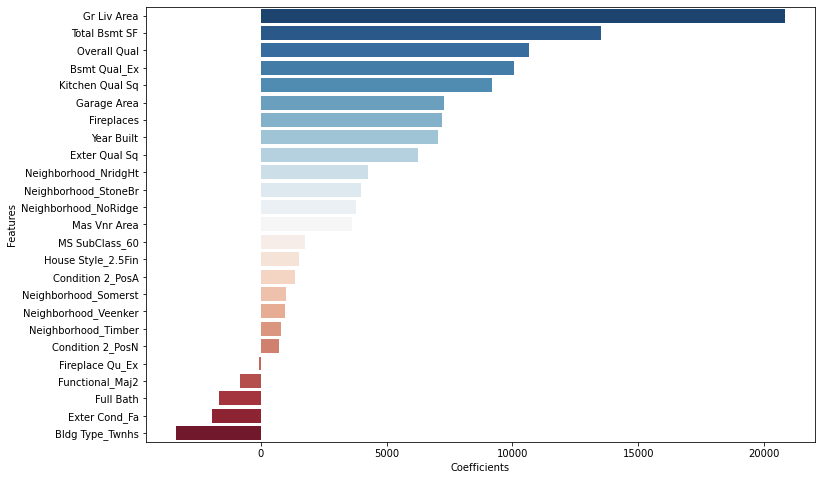

In [250]:
plt.figure(figsize=(12,8))
sns.barplot(x='Coefficients', y='Features', data=dataFrame, palette="RdBu_r")

From the plot of coefficients above, the top five features are Gr Liv Area, Total Bsmt SF, Overall Qual, Bsmt Qual_Ex as well as Kitchen Qual Sq. Other features that are performing relatively well to predict sale prices will be Exter Qual Sq, Fireplaces, Year Built and Garage Area.

In [212]:
# Obtaining the predicted sale price for X_test7.
y_hat7 = ridge_opt7.predict(X_test7_scaled)
y_hat7[:10]

array([328637.74452132, 243697.75867329, 220071.75825852, 228989.11338168,
       156277.26059046, 125898.7368611 , 146332.28953072, 140685.59741973,
       347723.60953684,  97881.20353328])

In [213]:
# Creating a dataframe for sale price and predicted sale price for X_test7
price_dict = {'sale_price': y_test7,
              'pred_price': y_hat7}
price_df = pd.DataFrame(price_dict)
price_df

sale_price     pred_price
684       327000  328637.744521
1404      244600  243697.758673
731       204000  220071.758259
600       213000  228989.113382
585       160000  156277.260590
...          ...            ...
1978      167500  176880.189618
432        60000   28028.778289
1924      263550  285615.436485
1844      113000   93191.707688
2025      298236  314720.426165

[506 rows x 2 columns]

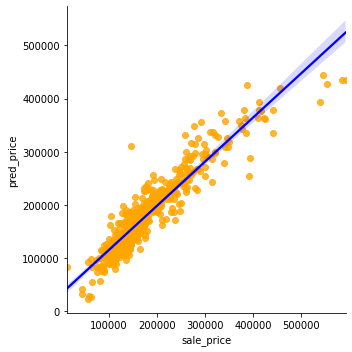

In [214]:
# Plot of Actual Sale Price VS Predicted sale prices 
sns.lmplot(x='sale_price', y='pred_price', data=price_df, scatter_kws={"color": "orange"}, line_kws={"color": "blue"});

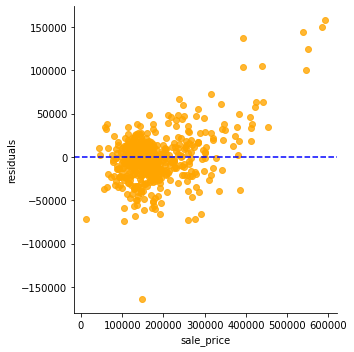

In [215]:
# Plot of residuals against sale prices
price_df['residuals'] = price_df['sale_price'] - price_df['pred_price']
sns.lmplot(x='sale_price', y='residuals', data=price_df, fit_reg=False, scatter_kws={"color": "orange"})
plt.axhline(y = 0, color ="blue", linestyle ="--")

As we can see from the scatter plot of actual sale price VS predicted sale prices, the model can generally predicted the sale price with a RMSE of \$27124.

However, properties with high sale prices have very large residuals, meaning that the predicted sale price of these properties tend to be below the actual value and the model is not good in predicting high value houses.

## 6. Prediction using test data set

In [216]:
test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM     69.000000      9142   Pave   
1  2718  905108090           90        RL     69.042105      9662   Pave   
2  2414  528218130           60        RL     58.000000     17104   Pave   
3  1989  902207150           30        RM     60.000000      8520   Pave   
4   625  535105100           20        RL     68.599197      9500   Pave   

  Lot Shape Land Contour Utilities  ... Enclosed Porch 3Ssn Porch  \
0       Reg          Lvl    AllPub  ...            112          0   
1       IR1          Lvl    AllPub  ...              0          0   
2       IR1          Lvl    AllPub  ...              0          0   
3       Reg          Lvl    AllPub  ...            184          0   
4       IR1          Lvl    AllPub  ...              0          0   

  Screen Porch Pool Area Pool QC Fence Misc Val  Mo Sold  Yr Sold  Sale Type  
0            0         0      NA    NA        0        4     2006        WD   
1            0         0      NA    NA        0        8     2006        WD   
2            0         0      NA    NA        0        9     2006        New  
3            0         0      NA    NA        0        7     2007        WD   
4          185         0      NA    NA        0        7     2009        WD   

[5 rows x 78 columns]

In [217]:
# Converting relevant non-numerical features with one-hot encoding

test_dummies = ['MS SubClass','Land Contour','MS Zoning','Neighborhood','Condition 1','Condition 2',
               'Bldg Type','Fireplace Qu','Pool QC','Functional','Bsmt Exposure','House Style','Exter Qual',
               'Heating QC','Bsmt Qual','Exter Cond']
test_new = pd.get_dummies(test, columns=test_dummies)
test_new.head()

Id        PID  Lot Frontage  Lot Area Street Lot Shape Utilities  \
0  2658  902301120     69.000000      9142   Pave       Reg    AllPub   
1  2718  905108090     69.042105      9662   Pave       IR1    AllPub   
2  2414  528218130     58.000000     17104   Pave       IR1    AllPub   
3  1989  902207150     60.000000      8520   Pave       Reg    AllPub   
4   625  535105100     68.599197      9500   Pave       IR1    AllPub   

  Lot Config Land Slope  Overall Qual  ...  Bsmt Qual_Fa  Bsmt Qual_Gd  \
0     Inside        Gtl             6  ...             1             0   
1     Inside        Gtl             5  ...             0             1   
2     Inside        Gtl             7  ...             0             1   
3     Inside        Gtl             5  ...             0             0   
4     Inside        Gtl             6  ...             0             1   

   Bsmt Qual_NA Bsmt Qual_Po Bsmt Qual_TA Exter Cond_Ex Exter Cond_Fa  \
0             0            0            0             0             1   
1             0            0            0             0             0   
2             0            0            0             0             0   
3             0            0            1             0             0   
4             0            0            0             0             0   

  Exter Cond_Gd  Exter Cond_Po Exter Cond_TA  
0             0              0             0  
1             0              0             1  
2             0              0             1  
3             0              0             1  
4             0              0             1  

[5 rows x 178 columns]

In [218]:
# Adding feature engineering for order 2 
test_new['Year Built Sq'] = test_new['Year Built']**2
test_new['Overall Qual Sq'] = test_new['Overall Qual']**2
test_new['Exter Qual Sq'] = test_new['Year Built']**2
test_new['Kitchen Qual Sq'] = test_new['Overall Qual']**2

In [219]:
# Combining some dummies features 

test_new['Neighborhood_Ex'] = test_new['Neighborhood_StoneBr']+test_new['Neighborhood_NoRidge']+test_new['Neighborhood_NridgHt']
test_new['Neighborhood_Gd'] = test_new['Neighborhood_Timber']+test_new['Neighborhood_Somerst']+test_new['Neighborhood_Veenker']
test_new['Functional_Po'] = test_new['Functional_Maj2']

# Neighborhood_GrnHill and Functional_Sev were not found in test data set 
# They were removed from feature engineering.


In [220]:
# Writing ames_new and test_new dataframe to csv file

ames_new.to_csv('datasets/ames_new.csv')
test_new.to_csv('datasets/test_new.csv')

#### Predicting with Test Model 6

In [221]:
# Fitting Test Model 6 onto test data
X6_test = test_new[['Gr Liv Area', 'Mas Vnr Area', 'Total Bsmt SF', 'Garage Area', 
               'Year Built Sq', 'Full Bath', 'Fireplaces', 'Overall Qual Sq', 
               'MS SubClass_60', 'Land Contour_HLS', 'MS Zoning_FV', 'Neighborhood_Ex', 
               'Neighborhood_Gd', 'Condition 1_PosN', 'Condition 2_PosA', 'Condition 2_PosN', 
               'Bldg Type_Twnhs', 'Fireplace Qu_Ex', 'Functional_Po',
               'Overall Cond', 'Bsmt Exposure_Gd', 'House Style_2.5Fin', 'Exter Qual Sq', 
               'Kitchen Qual Sq', 'Heating QC_Ex', 'Bsmt Qual_Ex']]
#'Pool QC_Gd' taken out.

In [222]:
# Scaling the test data
X6_test_scaled = ss6.transform(X6_test)

In [223]:
y6_predict = lasso_opt6.predict(X6_test_scaled)
y6_predict[:10]

array([346184.82891709, 273578.43229254, 307092.23340472, 233676.89637169,
       294291.14588722, 219441.63838649, 224516.78604002, 291025.37400997,
       318967.56803124, 309007.66005388])

In [224]:
test_new['SalePrice'] = y6_predict

In [225]:
sol_2 = test_new[['Id','SalePrice']]
sol_2.head()

Id      SalePrice
0  2658  346184.828917
1  2718  273578.432293
2  2414  307092.233405
3  1989  233676.896372
4   625  294291.145887

In [226]:
#sol_2.to_csv('submissions/sol_2.csv',index=False)

#### Predicting with Test Model 7

In [227]:
X7_test = test_new[['Gr Liv Area', 'Mas Vnr Area', 'Total Bsmt SF', 'Garage Area', 
               'Year Built', 'Full Bath', 'Fireplaces', 'Overall Qual', 
               'MS SubClass_60', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 
               'Neighborhood_Timber', 'Neighborhood_Veenker', 'Neighborhood_NoRidge', 
               'Neighborhood_NridgHt','Condition 2_PosA', 'Condition 2_PosN', 'Bldg Type_Twnhs', 
               'House Style_2.5Fin', 'Exter Qual Sq', 'Kitchen Qual Sq', 'Exter Cond_Ex', 
               'Bsmt Qual_Ex', 'Functional_Maj2', 'Fireplace Qu_Ex']]
#'Functional_Sev', 'Lot Config_FR3', 'Neighborhood_GrnHill'

In [228]:
# Scaling the test data
X7_test_scaled = ss7.fit_transform(X7_test)

In [229]:
y7_predict = ridge_opt7.predict(X7_test_scaled)
y7_predict[:10]

array([151925.88294302, 204447.15683885, 193875.56343309, 108000.0691532 ,
       197305.12923282, 101561.8346398 , 106658.52809583, 145487.64554231,
       201143.11580233, 183306.40209791])

In [230]:
test_new['SalePrice'] = y7_predict

In [231]:
sol_3 = test_new[['Id','SalePrice']]
sol_3.head()

Id      SalePrice
0  2658  151925.882943
1  2718  204447.156839
2  2414  193875.563433
3  1989  108000.069153
4   625  197305.129233

In [232]:
#sol_3.to_csv('submissions/sol_3.csv',index=False)

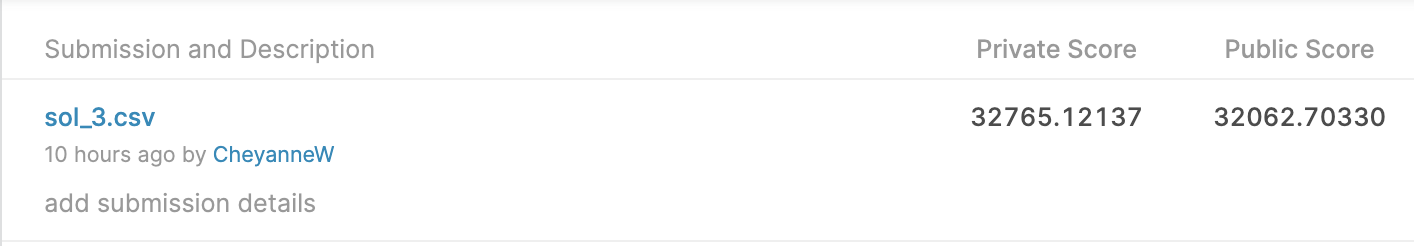

As expected, sale prices that is predicted using Test model 7 gave better scoring as compared to Test Model 6. For Test Model 6, we have a public score of 141554 which is much higher than sol_3 Kaggle score which is 32765. We will select Test Model 7 as our prediction base.

## 7. Key Observations and Conclusion

### Key Observations

We have seen many features having a positive correlation relationship, indicating that many features multicollinear in nature. When doing features selection, we need to keep this in mind so that we will not overfit our model. 

For this project, in the initial stage, I have separated out Size and Land features separately. It is found that some of the size features have the highest significance in affecting the prediction of sale prices. For the other features, we look at three different groups of data - ordinal, nominal and numerical features. 

We started off with building a model that only includes the key features from Size to get a gauge of the model performance. This starts off as the base of our model. We then built a second test model with all the 49 selected features, and as expected, we obtained a very poor R2 score and clearly, the model is overfitting. We then applied Ridge regression and Lasso regression on the second test models to see how the features actually affect the sale prices. Lasso was very useful in this case since we have an overwhelming number of features, it helped to eliminate some of the features that are not as significant. From there, we modified and reselected some of the other features based on prior experience and eventually arrived at Test Model 7 that we used to predict sale prices for our test data. We have decided to use Ridge regression for our final selected model as we do not want to elminate any more features but intead to decrease the variance of our model so as to minimise any overfitting. Test Model 7 gave a relatively good RMSE value as well as higher consistency in its R2 scores before train and test data.

### Conclusion

<AxesSubplot:xlabel='Coefficients', ylabel='Features'>

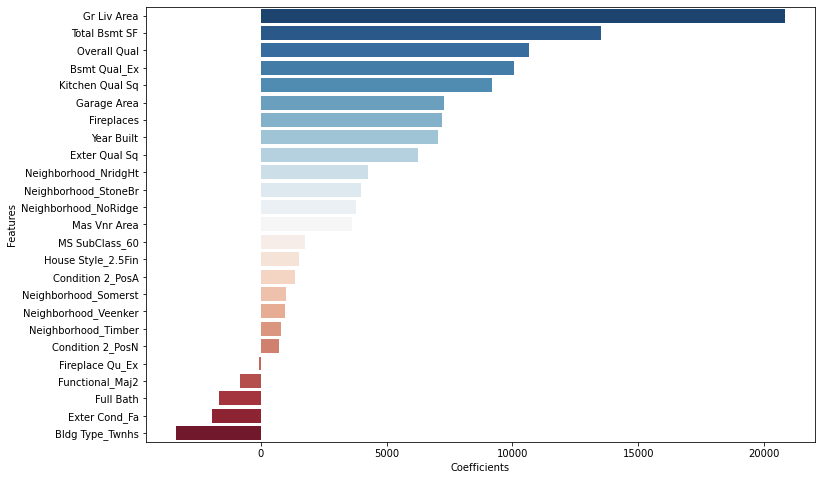

In [251]:
plt.figure(figsize=(12,8))
sns.barplot(x='Coefficients', y='Features', data=dataFrame, palette="RdBu_r")

Our clients often come to our consultation team with a list of properties that they are interested in. Our team will then collect data on these properties and provide a thorough analysis on important features and also give an estimate of their sale prices. Using Test Model 7's coefficent table, we have quickly identified five main features: Gr Liv Area, Total Bsmt SF, Overall Qual, Bsmt Qual_Ex as well as Kitchen Qual Sq. A glance at these features will provide us with an initial estimate on the range of expected sale prices to manage clients expectations.

We will then perform an estimate of the sale prices using our regression model, and compare our estimated pricing with the actual asking prices from the property owners. With these information, we can then advise our clients on the perceived property values and which of the selected properties are worth the asking sale prices, and which ones are overpriced or underpriced. 

### To improve on the model...

There are steps that we can take to create a better model. We will continue to explore and improve our linear regression model from here.

1. By taking the log of Sale Price, it is found that the frequency distribution follows the shape of a normal curve, which mean 95% of our data will fall within 2-sigma from the mean of log of sale prices. We can model our linear regression using the log of sale prices instead as our current model does not fit the properties with high value very well. Alternatively, we can also remove these properties with high values before building our linear regression model. By removing these outliers, we can get a better regression fit between our features and sale prices for the rest of the properties.


Text(0.5, 1.0, 'Frequency Distribution of log of Sale Price')

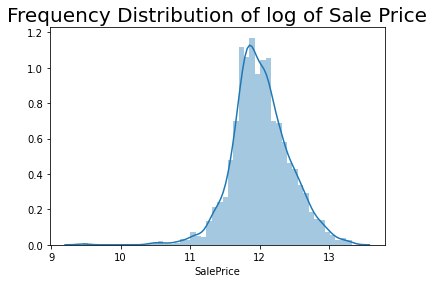

In [234]:
sns.distplot(np.log(ames['SalePrice']));
plt.title('Frequency Distribution of log of Sale Price', {'fontsize': 20})

2. For our current model, we have used ordinal values for selected features and for some features, we have chosen to use one-hot encoding. We can use ordinal values for more features such as Neighbourhood, by grouping neighborhoods with higher mean prices together and giving them a higher ranking, than the properties with lower mean prices across the group. This is because for each dummies feature created from Neighborhood, each dummy feature has a very small sample size and using ordinal values for features which combines a few classes together might be a better idea. Similar for other features like Functional and Exter Cond,  and some of others with very small sample classes can change to ordinal assignment.

3. As there were quite a large number of missing data, we need to form our data collection team and collect better data so as to reduce bias and variance of our linear regression model. They will also be doing inspections with our clients and verifying new property data so ensure that the information is accurate.

4. For each test model, we can run all 4 regularization techniques to compare their performance, namely, Ridge regression, Lasso regression, eNet regression as well as RFE. We can continuous refine our data and create more test models and obtain better performaning model as time changes.

5. There are other external factors that we have not explored, like economical factors (financial crisis), natural disasters prone areas, population density and community demographics etc. 